# IF3170 Artificial Intelligence | Tugas Besar 2

This notebook serves as a template for the assignment. Please create a copy of this notebook to complete your work. You can add more code blocks, markdown blocks, or new sections if needed.


Group Number: 8

Group Members:
- Ibrahim Ihsan Rasyid (13522018)
- Erdianti Wiga Putri Andini (13522053)
- Ellijah Darrellshane Suryanegara (13522097)
- Muhammad Dava Fathurrahman (13522114)

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import *
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from scipy import stats
from google.colab import drive
import sys
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, PowerTransformer, LabelEncoder, MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from collections import Counter
from sklearn.metrics import classification_report, accuracy_score, log_loss


# Import other libraries if needed

## Import Dataset

### Train Dataset

In [ ]:
# https://drive.google.com/file/d/1LVJ3DxkggnKxOyqAsCC5r6g3xFlXVemw/view?usp=sharing

df_additional_train = pd.read_csv('https://drive.google.com/uc?id=1LVJ3DxkggnKxOyqAsCC5r6g3xFlXVemw')
df_additional_train.head()

is_sm_ips_ports  ct_state_ttl  ct_flw_http_mthd  is_ftp_login  ct_ftp_cmd  \
0              0.0           0.0               0.0           0.0         0.0   
1              0.0           2.0               0.0           0.0         0.0   
2              0.0           NaN               0.0           0.0         0.0   
3              0.0           0.0               0.0           0.0         0.0   
4              0.0           0.0               0.0           0.0         0.0   

   ct_srv_src  ct_srv_dst  ct_dst_ltm  ct_src_ltm  ct_src_dport_ltm  \
0        11.0         NaN         5.0         4.0               2.0   
1        10.0        10.0        10.0        10.0               NaN   
2         4.0         4.0         2.0         2.0               1.0   
3         9.0         9.0         3.0         2.0               2.0   
4         3.0         3.0         4.0         3.0               1.0   

   ct_dst_sport_ltm  ct_dst_src_ltm  id  
0               1.0             5.0   0  
1              10.0            10.0   1  
2               1.0             4.0   2  
3               1.0             6.0   3  
4               NaN             1.0   4

In [ ]:
# https://drive.google.com/file/d/1UjioEY2n31qZ33cdHka0KFGCMDkWETeo/view?usp=drive_link

df_basic_train = pd.read_csv('https://drive.google.com/uc?id=1UjioEY2n31qZ33cdHka0KFGCMDkWETeo')
df_basic_train.head()

state       dur   sbytes    dbytes   sttl   dttl  sloss  dloss service  \
0   FIN  2.736664  13350.0  548216.0   31.0   29.0   21.0  197.0       -   
1   INT  0.000009    114.0       0.0  254.0    0.0    0.0    0.0     dns   
2   FIN  5.788526   6102.0    3892.0  254.0  252.0   13.0   13.0       -   
3   FIN  3.849634  25160.0       NaN   31.0   29.0   38.0  390.0       -   
4   CON  0.001052    130.0     162.0    NaN   29.0    0.0    0.0     dns   

          sload         dload  spkts  dpkts  id  
0  3.885899e+04  1.598925e+06  232.0  438.0   0  
1  5.066666e+07  0.000000e+00    2.0    0.0   1  
2  8.199669e+03  5.221364e+03   36.0   34.0   2  
3  5.216912e+04  2.272451e+06  448.0  858.0   3  
4  4.942966e+05  6.159696e+05    2.0    2.0   4

In [ ]:
# https://drive.google.com/file/d/1Mf2HRhZbrd45GTUFbSexGUMDOGN6V8Mg/view?usp=drive_link

df_content_train = pd.read_csv('https://drive.google.com/uc?id=1Mf2HRhZbrd45GTUFbSexGUMDOGN6V8Mg')
df_content_train.head()

swin   dwin         stcpb        dtcpb  smean   dmean  trans_depth  \
0  255.0  255.0  4.864839e+08  492604340.0   58.0     NaN          0.0   
1    0.0    0.0  0.000000e+00          0.0   57.0     0.0          0.0   
2  255.0  255.0  3.835852e+09  201002858.0  170.0   114.0          0.0   
3  255.0  255.0           NaN  661443578.0   56.0  1276.0          0.0   
4    0.0    0.0  0.000000e+00          0.0   65.0    81.0          0.0   

   response_body_len  id  
0                0.0   0  
1                0.0   1  
2                0.0   2  
3                0.0   3  
4                0.0   4

In [ ]:
# https://drive.google.com/file/d/1wXMZ4HW9jNj1-XN2S1qxqLWWDRyVxeZI/view?usp=drive_link

df_flow_train = pd.read_csv('https://drive.google.com/uc?id=1wXMZ4HW9jNj1-XN2S1qxqLWWDRyVxeZI')
df_flow_train.head()

proto  id
0   tcp   0
1   udp   1
2   tcp   2
3   tcp   3
4   udp   4

In [ ]:
# https://drive.google.com/file/d/1SQLv-oX0PZ7T-rb7Uerk_SvSzM7hFs4O/view?usp=drive_link

df_label_train = pd.read_csv('https://drive.google.com/uc?id=1SQLv-oX0PZ7T-rb7Uerk_SvSzM7hFs4O')
df_label_train.head()

attack_cat  label  id
0     Normal      0   0
1    Generic      1   1
2   Exploits      1   2
3     Normal      0   3
4     Normal      0   4

In [ ]:
# https://drive.google.com/file/d/1eXeGisyTOf4QYlsoNFwxUseIduUyQZXC/view?usp=drive_link

df_time_train = pd.read_csv('https://drive.google.com/uc?id=1eXeGisyTOf4QYlsoNFwxUseIduUyQZXC')
df_time_train.head()

sjit         djit      sinpkt      dinpkt    tcprtt    synack  \
0  4449.110313  3234.831566   11.845558    6.261361       NaN  0.000444   
1     0.000000     0.000000    0.009000    0.000000  0.000000  0.000000   
2  8561.040438   249.950547  165.386453  172.345750  0.158826  0.057902   
3  4053.086020  2918.730804    8.669644    4.496707  0.000558  0.000448   
4     0.000000     0.000000    0.008000    0.007000  0.000000  0.000000   

     ackdat  id  
0  0.000114   0  
1       NaN   1  
2  0.100924   2  
3       NaN   3  
4  0.000000   4

**Merge Train Dataset**

In [ ]:
# Merge Dataset

df_train = df_basic_train.copy()

dataframes = [df_additional_train, df_content_train, df_flow_train, df_label_train, df_time_train]
for df in dataframes:
  df_train = pd.merge(df_train, df, on='id', how='left')
# df_train = pd.concat(dataframes, axis=1, join='inner').loc[:,~pd.concat(dataframes, axis=1).columns.duplicated()]
df_train = df_train.drop(columns=['id', 'label'])
df_train.head()

state       dur   sbytes    dbytes   sttl   dttl  sloss  dloss service  \
0   FIN  2.736664  13350.0  548216.0   31.0   29.0   21.0  197.0       -   
1   INT  0.000009    114.0       0.0  254.0    0.0    0.0    0.0     dns   
2   FIN  5.788526   6102.0    3892.0  254.0  252.0   13.0   13.0       -   
3   FIN  3.849634  25160.0       NaN   31.0   29.0   38.0  390.0       -   
4   CON  0.001052    130.0     162.0    NaN   29.0    0.0    0.0     dns   

          sload  ...  response_body_len  proto  attack_cat         sjit  \
0  3.885899e+04  ...                0.0    tcp      Normal  4449.110313   
1  5.066666e+07  ...                0.0    udp     Generic     0.000000   
2  8.199669e+03  ...                0.0    tcp    Exploits  8561.040438   
3  5.216912e+04  ...                0.0    tcp      Normal  4053.086020   
4  4.942966e+05  ...                0.0    udp      Normal     0.000000   

          djit      sinpkt      dinpkt    tcprtt    synack    ackdat  
0  3234.831566   11.845558    6.261361       NaN  0.000444  0.000114  
1     0.000000    0.009000    0.000000  0.000000  0.000000       NaN  
2   249.950547  165.386453  172.345750  0.158826  0.057902  0.100924  
3  2918.730804    8.669644    4.496707  0.000558  0.000448       NaN  
4     0.000000    0.008000    0.007000  0.000000  0.000000  0.000000  

[5 rows x 42 columns]

### Test Dataset

In [ ]:
# https://drive.google.com/file/d/1rmBUQBh0gBO-ZbS0hrP0VqCu9ZMVVjcc/view?usp=drive_link

df_additional_test = pd.read_csv('https://drive.google.com/uc?id=1rmBUQBh0gBO-ZbS0hrP0VqCu9ZMVVjcc')
df_additional_test.head()

is_sm_ips_ports  ct_state_ttl  ct_flw_http_mthd  is_ftp_login  ct_ftp_cmd  \
0              0.0           1.0               0.0           0.0         0.0   
1              0.0           1.0               0.0           NaN         0.0   
2              0.0           1.0               0.0           0.0         0.0   
3              0.0           2.0               0.0           0.0         0.0   
4              NaN           0.0               NaN           0.0         0.0   

   ct_srv_src  ct_srv_dst  ct_dst_ltm  ct_src_ltm  ct_src_dport_ltm  \
0         5.0         5.0         2.0         2.0               2.0   
1         6.0         6.0         1.0         1.0               1.0   
2         4.0         4.0         1.0         2.0               1.0   
3        10.0         4.0         2.0         4.0               2.0   
4        13.0        11.0        10.0         7.0               6.0   

   ct_dst_sport_ltm  ct_dst_src_ltm  id  
0               1.0             2.0   0  
1               1.0             5.0   1  
2               1.0             4.0   2  
3               1.0             4.0   3  
4               1.0             7.0   4

In [ ]:
# https://drive.google.com/file/d/1UiY5GfE2sbr-f2BCAjjXI53JH1SGB3Gb/view?usp=drive_link

df_basic_test = pd.read_csv('https://drive.google.com/uc?id=1UiY5GfE2sbr-f2BCAjjXI53JH1SGB3Gb')
df_basic_test.head()

state       dur  sbytes  dbytes   sttl   dttl  sloss  dloss service  \
0   FIN  0.454980   534.0   268.0  254.0  252.0    2.0    1.0       -   
1   FIN  0.648037  8854.0   268.0  254.0  252.0    4.0    1.0       -   
2   FIN  1.120856  3440.0   642.0  254.0  252.0    5.0    3.0       -   
3   INT  0.000001   244.0     0.0  254.0    NaN    0.0    0.0     NaN   
4   FIN  0.264763  1540.0  1644.0   31.0   29.0    4.0    4.0       -   

           sload         dload  spkts  dpkts  id  
0    8457.514648   3938.634766   10.0    6.0   0  
1  101500.375000   2765.274170   14.0    6.0   1  
2   23018.121090   4203.929688   16.0   12.0   2  
3            NaN      0.000000    2.0    0.0   3  
4   43631.472660  46924.984380   16.0   18.0   4

In [ ]:
# https://drive.google.com/file/d/1dlc1v0xH9B1oEoTSkBF2aYhdCJmZ9fub/view?usp=drive_link

df_content_test = pd.read_csv('https://drive.google.com/uc?id=1dlc1v0xH9B1oEoTSkBF2aYhdCJmZ9fub')
df_content_test.head()

swin   dwin         stcpb         dtcpb  smean  dmean  trans_depth  \
0  255.0  255.0  2.914597e+08  3.441056e+09   53.0   45.0          0.0   
1  255.0  255.0  2.288130e+09  3.754733e+07  632.0   45.0          0.0   
2  255.0  255.0  2.901133e+09  1.323903e+09  215.0   54.0          0.0   
3    0.0    0.0  0.000000e+00           NaN    NaN    0.0          0.0   
4  255.0  255.0  2.457682e+09  3.533657e+08   96.0   91.0          0.0   

   response_body_len  id  
0                0.0   0  
1                0.0   1  
2                0.0   2  
3                0.0   3  
4                0.0   4

In [ ]:
# https://drive.google.com/file/d/1WmshM8OZbh2XE9nsHFWzAXjfFGMr_K4v/view?usp=drive_link

df_flow_test = pd.read_csv('https://drive.google.com/uc?id=1WmshM8OZbh2XE9nsHFWzAXjfFGMr_K4v')
df_flow_test.head()

proto  id
0   tcp   0
1   tcp   1
2   tcp   2
3   udp   3
4   tcp   4

In [ ]:
# https://drive.google.com/file/d/13O49z07McROt6i2sTUWWUpsnaSthlCcJ/view?usp=drive_link

df_time_test = pd.read_csv('https://drive.google.com/uc?id=13O49z07McROt6i2sTUWWUpsnaSthlCcJ')
df_time_test.head()

sjit        djit     sinpkt      dinpkt    tcprtt    synack  \
0  2737.954123  118.833969  48.756556   76.593602  0.165117  0.072001   
1  2938.299144  165.780563  49.812539  109.557602  0.223604  0.100248   
2  4287.453629  129.471406  69.765530   94.395906  0.113189  0.082498   
3     0.000000    0.000000   0.001000    0.000000  0.000000  0.000000   
4  1119.063538   26.748141  17.628799   15.543294  0.000655  0.000526   

     ackdat  id  
0  0.093116   0  
1  0.123356   1  
2  0.030691   2  
3  0.000000   3  
4  0.000129   4

**Merge Test Dataset**

In [ ]:
df_test = df_basic_test.copy()

dataframes = [df_additional_test, df_content_test, df_flow_test, df_time_test]
for df in dataframes:
  df_test = pd.merge(df_test, df, on='id', how='left')

df_test.head()

state       dur  sbytes  dbytes   sttl   dttl  sloss  dloss service  \
0   FIN  0.454980   534.0   268.0  254.0  252.0    2.0    1.0       -   
1   FIN  0.648037  8854.0   268.0  254.0  252.0    4.0    1.0       -   
2   FIN  1.120856  3440.0   642.0  254.0  252.0    5.0    3.0       -   
3   INT  0.000001   244.0     0.0  254.0    NaN    0.0    0.0     NaN   
4   FIN  0.264763  1540.0  1644.0   31.0   29.0    4.0    4.0       -   

           sload  ...  trans_depth  response_body_len  proto         sjit  \
0    8457.514648  ...          0.0                0.0    tcp  2737.954123   
1  101500.375000  ...          0.0                0.0    tcp  2938.299144   
2   23018.121090  ...          0.0                0.0    tcp  4287.453629   
3            NaN  ...          0.0                0.0    udp     0.000000   
4   43631.472660  ...          0.0                0.0    tcp  1119.063538   

         djit     sinpkt      dinpkt    tcprtt    synack    ackdat  
0  118.833969  48.756556   76.593602  0.165117  0.072001  0.093116  
1  165.780563  49.812539  109.557602  0.223604  0.100248  0.123356  
2  129.471406  69.765530   94.395906  0.113189  0.082498  0.030691  
3    0.000000   0.001000    0.000000  0.000000  0.000000  0.000000  
4   26.748141  17.628799   15.543294  0.000655  0.000526  0.000129  

[5 rows x 42 columns]

##Import Custom Library

In [ ]:
# drive.mount('/content/drive')
# sys.path.append('/content/drive/MyDrive/Tubes2_AI_08')

# from ID3 import ID3
# from ID3Sklearn import ID3Sklearn

# Exploratory Data Analysis (Optional)

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and visualizing data sets to uncover patterns, trends, anomalies, and insights. It is the first step before applying more advanced statistical and machine learning techniques. EDA helps you to gain a deep understanding of the data you are working with, allowing you to make informed decisions and formulate hypotheses for further analysis.

In [ ]:
# DATA SIZE AND TYPES

print("----- DATA SIZE -----")
data_size = df_train.shape
size_table = pd.DataFrame({
    'Instances': [data_size[0]],
    'Features': [data_size[1]]
})
display(size_table)

print("\n----- DATA TYPES -----")
types_table = pd.DataFrame(df_train.dtypes)
display(types_table)

----- DATA SIZE -----


Instances  Features
0     175341        42


----- DATA TYPES -----


0
state               object
dur                float64
sbytes             float64
dbytes             float64
sttl               float64
dttl               float64
sloss              float64
dloss              float64
service             object
sload              float64
dload              float64
spkts              float64
dpkts              float64
is_sm_ips_ports    float64
ct_state_ttl       float64
ct_flw_http_mthd   float64
is_ftp_login       float64
ct_ftp_cmd         float64
ct_srv_src         float64
ct_srv_dst         float64
ct_dst_ltm         float64
ct_src_ltm         float64
ct_src_dport_ltm   float64
ct_dst_sport_ltm   float64
ct_dst_src_ltm     float64
swin               float64
dwin               float64
stcpb              float64
dtcpb              float64
smean              float64
dmean              float64
trans_depth        float64
response_body_len  float64
proto               object
attack_cat          object
sjit               float64
djit               float64
sinpkt             float64
dinpkt             float64
tcprtt             float64
synack             float64
ackdat             float64

In [ ]:
# CATEGORICAL DATA

categorical_data = df_train.select_dtypes(include=['object', 'category']).columns.tolist()
binary_columns = ['is_sm_ips_ports', 'is_ftp_login']
categorical_data.extend(binary_columns)
categorical_data = list(set(categorical_data))
categorical_data = [col for col in categorical_data if not col.endswith('_binned')]  # id ga masuk karena cuma identifier

unique_counts = df_train[['state', 'service', 'is_sm_ips_ports', 'is_ftp_login', 'proto', 'attack_cat']].nunique() # id ga dimasukin mana" karena dia cuma identifier
print("\n----- UNIQUE COUNTS (CATEGORICAL) -----")
display(unique_counts)

print("\n----- VALUE DISTRIBUTION PER DATA -----")
for column in categorical_data:
    print(f" {column.upper()} ")
    value_distribution = df_train[column].value_counts()
    proportion_distribution = df_train[column].value_counts(normalize=True) * 100
    distribution_table = pd.DataFrame({
        'Count': value_distribution,
        'Proportion (%)': proportion_distribution
    })
    display(distribution_table)


----- UNIQUE COUNTS (CATEGORICAL) -----


state                9
service             13
is_sm_ips_ports      2
is_ftp_login         4
proto              133
attack_cat          10
dtype: int64


----- VALUE DISTRIBUTION PER DATA -----
 PROTO 


Count  Proportion (%)
proto                        
tcp     75902       45.582680
udp     60105       36.095847
unas    11480        6.894274
arp      2726        1.637090
ospf     2468        1.482149
...       ...             ...
visa       89        0.053449
leaf-2     89        0.053449
igmp       18        0.010810
icmp       13        0.007807
rtp         1        0.000601

[133 rows x 2 columns]

 ATTACK_CAT 


Count  Proportion (%)
attack_cat                           
Normal          56000       31.937767
Generic         40000       22.812691
Exploits        33393       19.044605
Fuzzers         18184       10.370649
DoS             12264        6.994371
Reconnaissance  10491        5.983198
Analysis         2000        1.140635
Backdoor         1746        0.995774
Shellcode        1133        0.646169
Worms             130        0.074141

 IS_FTP_LOGIN 


Count  Proportion (%)
is_ftp_login                        
0.0           164251       98.534440
1.0             2422        1.452962
4.0               16        0.009598
2.0                5        0.003000

 SERVICE 


Count  Proportion (%)
service                        
-         89434       53.697989
dns       44909       26.964275
http      17784       10.677875
smtp       4815        2.891024
ftp-data   3795        2.278595
ftp        3263        1.959171
ssh        1242        0.745722
pop3       1054        0.632843
dhcp         93        0.055839
snmp         75        0.045032
ssl          51        0.030621
irc          25        0.015011
radius       10        0.006004

 IS_SM_IPS_PORTS 


Count  Proportion (%)
is_sm_ips_ports                        
0.0              163963       98.420121
1.0                2632        1.579879

 STATE 


Count  Proportion (%)
state                       
INT    78148       46.925590
FIN    73925       44.389802
CON    12481        7.494476
REQ     1889        1.134289
RST       78        0.046837
ECO       12        0.007206
URN        1        0.000600
PAR        1        0.000600
no         1        0.000600

In [ ]:
# NUMERICAL DATA

numerical_data = [col for col in df_train.columns if col not in categorical_data]

summary_stats = df_train[numerical_data].describe().loc[['min', '25%', '50%', '75%', 'max', 'mean', 'std']]
summary_stats.rename(index={'50%': 'median'}, inplace=True)
print("\n----- SUMMARY STATISTICS (NUMERICAL) -----")
display(summary_stats)


----- SUMMARY STATISTICS (NUMERICAL) -----


dur        sbytes        dbytes        sttl        dttl  \
min      0.000000  2.800000e+01  0.000000e+00    0.000000    0.000000   
25%      0.000008  1.140000e+02  0.000000e+00   62.000000    0.000000   
median   0.001548  4.500000e+02  1.640000e+02  254.000000   29.000000   
75%      0.667311  1.418000e+03  1.096000e+03  254.000000  252.000000   
max     59.999989  1.296523e+07  1.465555e+07  255.000000  254.000000   
mean     1.359299  8.734079e+03  1.493589e+04  179.521944   79.584179   
std      6.485386  1.712289e+05  1.430150e+05  102.957427  110.494848   

              sloss        dloss         sload         dload        spkts  \
min        0.000000     0.000000  0.000000e+00  0.000000e+00     1.000000   
25%        0.000000     0.000000  1.303032e+04  0.000000e+00     2.000000   
median     0.000000     0.000000  8.714544e+05  1.426630e+03     2.000000   
75%        3.000000     2.000000  8.888889e+07  2.807410e+04    12.000000   
max     4803.000000  5484.000000  5.988000e+09  2.242273e+07  9616.000000   
mean       4.904790     6.971688  7.342186e+07  6.718596e+05    20.266134   
std       64.867849    51.801936  1.884564e+08  2.422879e+06   136.433895   

        ...        dmean  trans_depth  response_body_len          sjit  \
min     ...     0.000000     0.000000       0.000000e+00  0.000000e+00   
25%     ...     0.000000     0.000000       0.000000e+00  0.000000e+00   
median  ...    44.000000     0.000000       0.000000e+00  0.000000e+00   
75%     ...    89.000000     0.000000       0.000000e+00  2.511184e+03   
max     ...  1458.000000   172.000000       6.558056e+06  1.460480e+06   
mean    ...   124.161041     0.106193       2.157133e+03  4.993982e+03   
std     ...   258.265755     0.794070       5.509898e+04  4.506783e+04   

                 djit        sinpkt        dinpkt    tcprtt    synack  \
min          0.000000      0.000000      0.000000  0.000000  0.000000   
25%          0.000000      0.008000      0.000000  0.000000  0.000000   
median       0.000000      0.284723      0.006000  0.000000  0.000000   
75%        114.753348     55.205806     50.933127  0.065151  0.023235   
max     289388.269700  84371.496000  56716.824000  2.518893  2.100352   
mean       604.891720    987.360974     87.763617  0.041331  0.021042   
std       4082.439167   7246.462797    987.040024  0.079428  0.043560   

          ackdat  
min     0.000000  
25%     0.000000  
median  0.000000  
75%     0.038951  
max     1.520884  
mean    0.020402  
std     0.040619  

[7 rows x 36 columns]

In [ ]:
# MISSING VALUES

missing_counts = df_train.isnull().sum()
missing_percentage = (missing_counts / len(df_train)) * 100
missing_summary = pd.DataFrame({'Missing Values': missing_counts, 'Percentage': missing_percentage})
print("\n----- Missing Values -----:")
display(missing_summary)


----- Missing Values -----:


Missing Values  Percentage
state                        8805    5.021644
dur                          8722    4.974307
sbytes                       8561    4.882486
dbytes                       8869    5.058144
sttl                         8825    5.033050
dttl                         8654    4.935526
sloss                        8794    5.015370
dloss                        8978    5.120308
service                      8791    5.013659
sload                        8786    5.010808
dload                        8837    5.039894
spkts                        8654    4.935526
dpkts                        8686    4.953776
is_sm_ips_ports              8746    4.987995
ct_state_ttl                 8635    4.924690
ct_flw_http_mthd             8647    4.931533
is_ftp_login                 8647    4.931533
ct_ftp_cmd                   8842    5.042745
ct_srv_src                   8851    5.047878
ct_srv_dst                   8774    5.003964
ct_dst_ltm                   8738    4.983432
ct_src_ltm                   8823    5.031909
ct_src_dport_ltm             8775    5.004534
ct_dst_sport_ltm             8788    5.011948
ct_dst_src_ltm               8895    5.072972
swin                         8740    4.984573
dwin                         8779    5.006815
stcpb                        8672    4.945791
dtcpb                        8803    5.020503
smean                        8788    5.011948
dmean                        8855    5.050159
trans_depth                  8785    5.010237
response_body_len            8791    5.013659
proto                        8826    5.033620
attack_cat                      0    0.000000
sjit                         8738    4.983432
djit                         8846    5.045027
sinpkt                       8707    4.965752
dinpkt                       8734    4.981151
tcprtt                       8836    5.039323
synack                       8736    4.982292
ackdat                       8595    4.901877


----- NUMERICAL DATA OUTLIERS BY IQR (True indicates an outlier) -----


dur                   True
sbytes                True
dbytes                True
sttl                 False
dttl                 False
sloss                 True
dloss                 True
sload                 True
dload                 True
spkts                 True
dpkts                 True
ct_state_ttl          True
ct_flw_http_mthd      True
ct_ftp_cmd            True
ct_srv_src            True
ct_srv_dst            True
ct_dst_ltm            True
ct_src_ltm            True
ct_src_dport_ltm      True
ct_dst_sport_ltm      True
ct_dst_src_ltm        True
swin                 False
dwin                 False
stcpb                False
dtcpb                False
smean                 True
dmean                 True
trans_depth           True
response_body_len     True
sjit                  True
djit                  True
sinpkt                True
dinpkt                True
tcprtt                True
synack                True
ackdat                True
dtype: bool


----- JUMLAH OUTLIER PER KOLOM NUMERICAL -----


dur                  14968
sbytes               21760
dbytes               26698
sttl                     0
dttl                     0
sloss                10879
dloss                26996
sload                12843
dload                36132
spkts                23470
dpkts                19752
ct_state_ttl          1838
ct_flw_http_mthd     16996
ct_ftp_cmd            2443
ct_srv_src           18379
ct_srv_dst           18380
ct_dst_ltm           21021
ct_src_ltm           12487
ct_src_dport_ltm     31801
ct_dst_sport_ltm     35385
ct_dst_src_ltm       16832
swin                     0
dwin                     0
stcpb                    0
dtcpb                    0
smean                19690
dmean                22185
trans_depth          16948
response_body_len    10723
sjit                 17146
djit                 19538
sinpkt               14034
dinpkt               13409
tcprtt               15228
synack               29934
ackdat                7878
dtype: int64


----- VISUALIZATION NUMERICAL DATA OUTLIERS -----


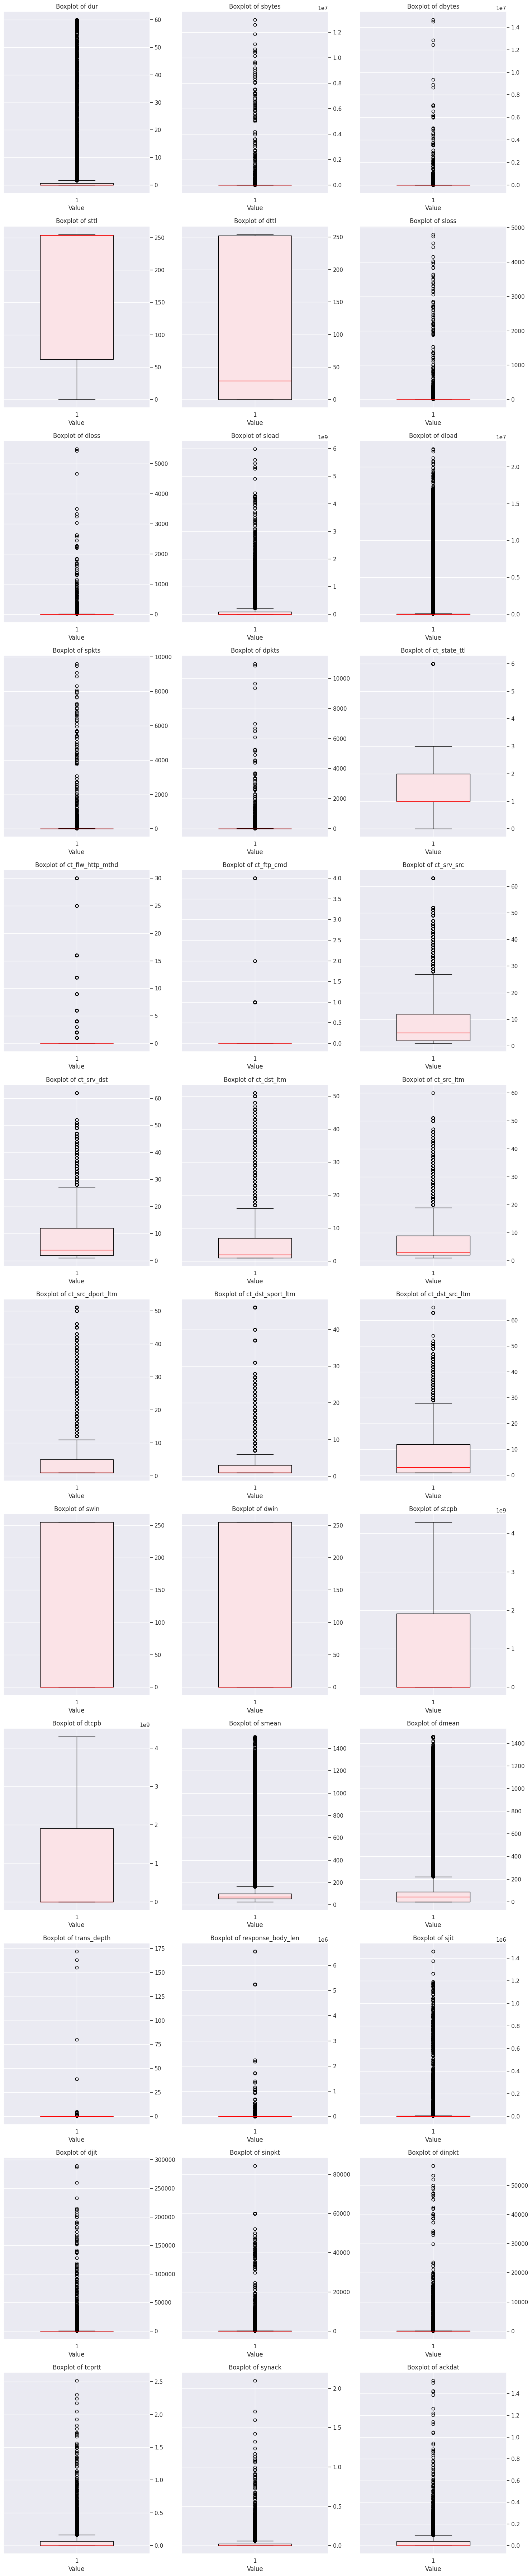

In [ ]:
# OUTLIERS NUMERICAL
print("\n----- NUMERICAL DATA OUTLIERS BY IQR (True indicates an outlier) -----")
df_train_numeric = df_train[numerical_data]

# IQR
Q1 = df_train_numeric.quantile(0.25)
Q3 = df_train_numeric.quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = (df_train_numeric < (Q1 - 1.5 * IQR)) | (df_train_numeric > (Q3 + 1.5 * IQR))
display(outliers_iqr.any())

# Jumlah outlier dalam data numerik berdasarkan IQR
print("\n----- JUMLAH OUTLIER PER KOLOM NUMERICAL -----")
outliers_count_per_column = outliers_iqr.sum()
display(outliers_count_per_column)

print("\n----- VISUALIZATION NUMERICAL DATA OUTLIERS -----")
sns.set(style="darkgrid")

num_columns = df_train_numeric.columns.size
num_rows = (num_columns // 3) + (num_columns % 3)
fig, ax = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 6 * num_rows))
ax = ax.flatten()

for i, column in enumerate(df_train_numeric.columns):
    ax[i].boxplot(df_train_numeric[column].dropna(), vert=True, widths=0.5, patch_artist=True,
                    boxprops=dict(facecolor='#fbe3e7', color='black'), medianprops=dict(color='red'))
    ax[i].set_title(f'Boxplot of {column}')
    ax[i].set_xlabel('Value')
    ax[i].yaxis.tick_right()

for j in range(i + 1, len(ax)):
    ax[j].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# OUTLIERS CATEGORICAL

df_train_categorical = df_train[categorical_data]
rare_category_results = {}
for column in df_train_categorical:
    frequency = df_train[column].value_counts(normalize=True)
    threshold = 0.01
    rare_categories = frequency[frequency < threshold]
    rare_category_results[column] = rare_categories

print("\nRARE CATEGORIES IN CATEGORICAL DATA:")
for column, rare_cats in rare_category_results.items():
    if not rare_cats.empty:
        print(f"\nRare categories in {column.upper()} (less than {threshold * 100}%):")
        display(rare_cats)
    else:
        print(f"\nNo rare categories detected in {column} that fall below the {threshold * 100}% threshold.")


RARE CATEGORIES IN CATEGORICAL DATA:

Rare categories in PROTO (less than 1.0%):


proto
sctp      0.006588
any       0.001670
gre       0.001297
pim       0.001177
mobile    0.001177
            ...   
visa      0.000534
leaf-2    0.000534
igmp      0.000108
icmp      0.000078
rtp       0.000006
Name: proportion, Length: 128, dtype: float64


Rare categories in ATTACK_CAT (less than 1.0%):


attack_cat
Backdoor     0.009958
Shellcode    0.006462
Worms        0.000741
Name: proportion, dtype: float64


Rare categories in IS_FTP_LOGIN (less than 1.0%):


is_ftp_login
4.0    0.000096
2.0    0.000030
Name: proportion, dtype: float64


Rare categories in SERVICE (less than 1.0%):


service
ssh       0.007457
pop3      0.006328
dhcp      0.000558
snmp      0.000450
ssl       0.000306
irc       0.000150
radius    0.000060
Name: proportion, dtype: float64


No rare categories detected in is_sm_ips_ports that fall below the 1.0% threshold.

Rare categories in STATE (less than 1.0%):


state
RST    0.000468
ECO    0.000072
URN    0.000006
PAR    0.000006
no     0.000006
Name: proportion, dtype: float64

In [ ]:
# CORRELATION CRAMER
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))

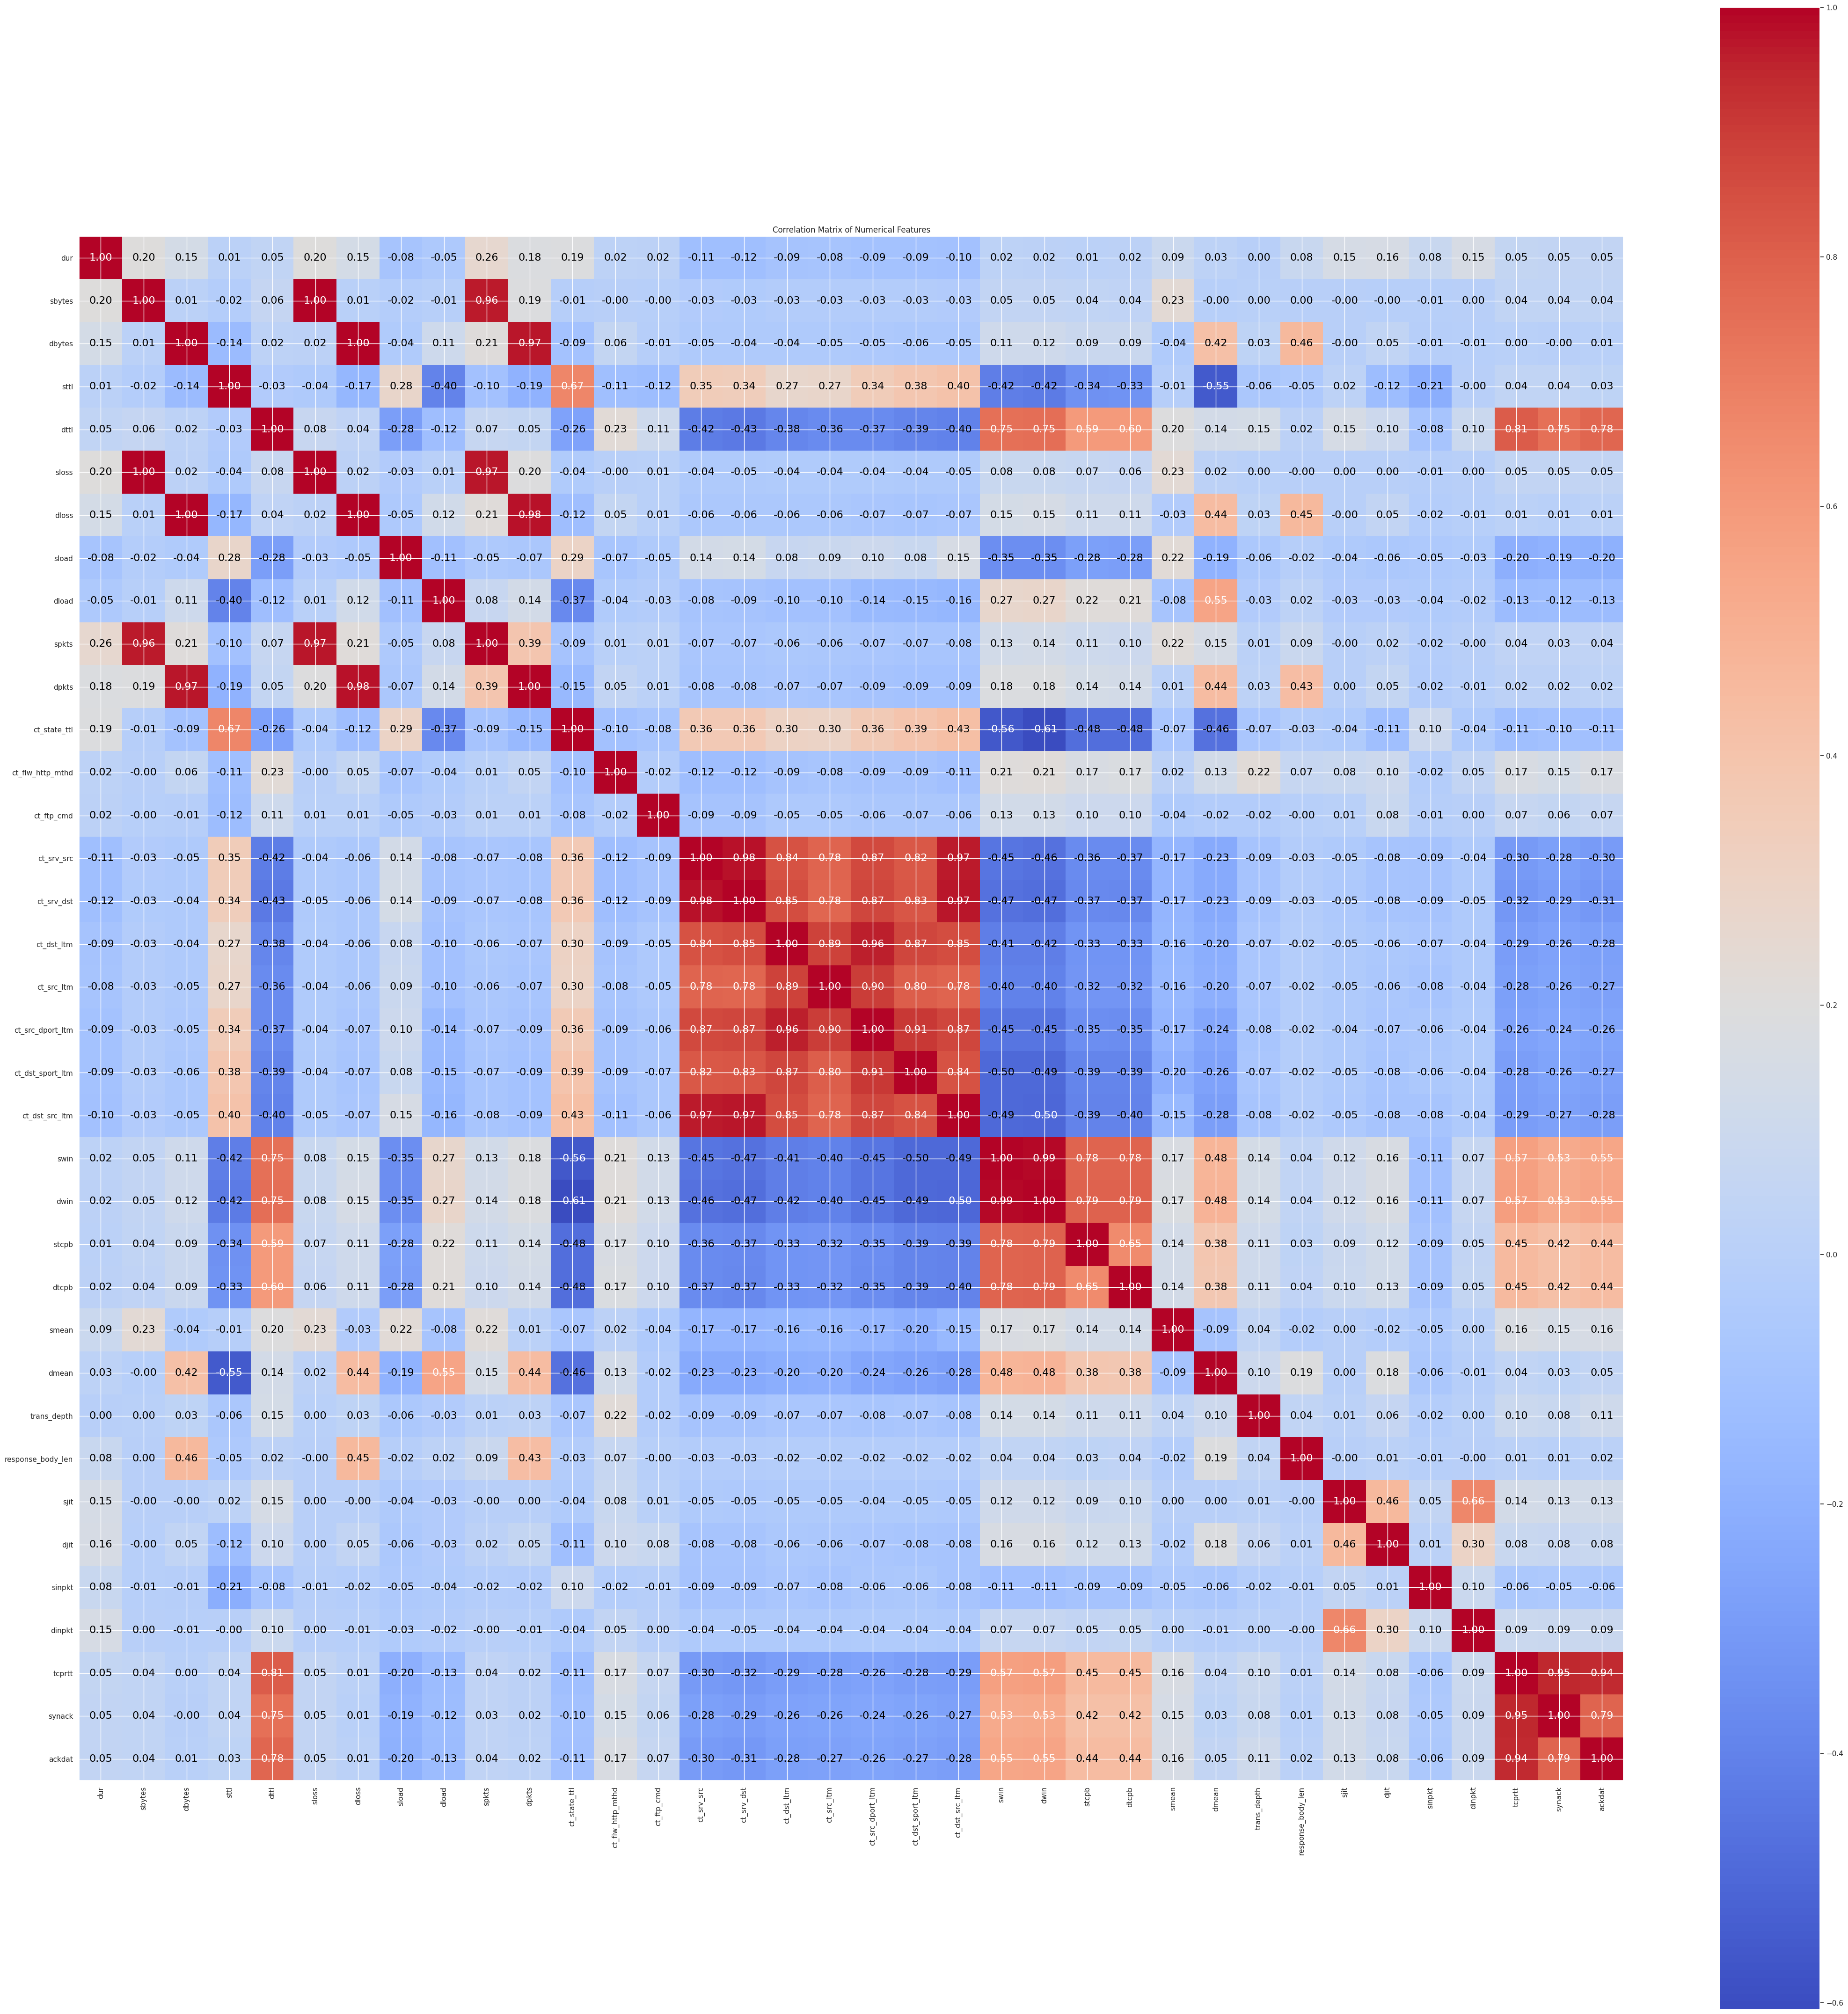

In [ ]:
# CORRELATION NUMERICAL DATA
correlation_matrix = df_train_numeric.corr()

fig, ax = plt.subplots(figsize=(len(correlation_matrix.columns)*1.2, len(correlation_matrix.columns)*1.2))

cax = ax.imshow(correlation_matrix, interpolation='nearest', cmap='coolwarm')
fig.colorbar(cax)

ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticks(np.arange(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, rotation=90)
ax.set_yticklabels(correlation_matrix.columns)

for (i, j), val in np.ndenumerate(correlation_matrix):
    ax.text(j, i, f"{val:.2f}", ha='center', va='center', color='white' if abs(val) > 0.5 else 'black', fontsize=16)

plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

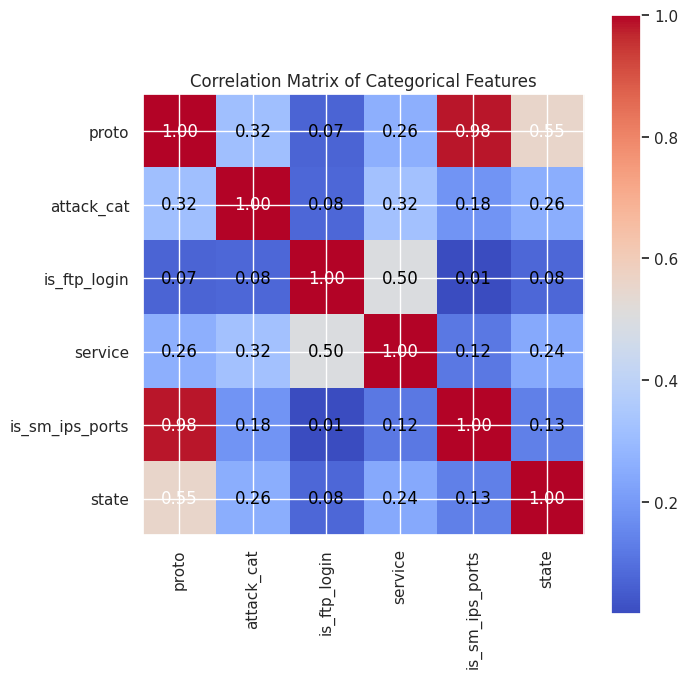

In [ ]:
# CATEGORICAL DATA
cat_columns = df_train[categorical_data].columns
cramers = {col: {col2: cramers_v(df_train[col], df_train[col2]) for col2 in cat_columns} for col in cat_columns}
cramers_v_matrix = pd.DataFrame(cramers)

fig, ax = plt.subplots(figsize=(len(cramers_v_matrix.columns)*1.2, len(cramers_v_matrix.columns)*1.2))
cax = ax.imshow(cramers_v_matrix, interpolation='nearest', cmap='coolwarm')
fig.colorbar(cax)

ax.set_xticks(np.arange(len(cramers_v_matrix.columns)))
ax.set_yticks(np.arange(len(cramers_v_matrix.columns)))
ax.set_xticklabels(cramers_v_matrix.columns, rotation=90)
ax.set_yticklabels(cramers_v_matrix.columns)

for (i, j), val in np.ndenumerate(cramers_v_matrix):
    ax.text(j, i, f"{val:.2f}", ha='center', va='center', color='white' if abs(val) > 0.5 else 'black', fontsize=12)

plt.title('Correlation Matrix of Categorical Features')
plt.tight_layout()
plt.show()

In [ ]:
# # DATA VISUALIZATION

# num_columns = 3
# num_numerical_cols = len(numerical_data)
# num_rows_numerical = math.ceil(num_numerical_cols / num_columns)
# fig, axes = plt.subplots(num_rows_numerical, num_columns, figsize=(20, 6 * num_rows_numerical))

# # Numerical Data Plotting
# for i, col in enumerate(numerical_data):
#     ax = axes.flatten()[i]
#     # Histogram with KDE
#     sns.histplot(df_train[col], bins=30, kde=True, color='#d88b98', ax=ax, stat='density')
#     ax.set_title(f'Distribution of {col}', fontsize=12)
#     ax.set_xlabel(col)
#     ax.set_ylabel('Density')

#     # Overlay Normal Distribution
#     mean = df_train[col].mean()
#     std = df_train[col].std()
#     xmin, xmax = ax.get_xlim()
#     x = np.linspace(xmin, xmax, 100)
#     p = stats.norm.pdf(x, mean, std)
#     ax.plot(x, p, 'k--', linewidth=2, label='Normal Curve')
#     ax.legend()

# # Hide empty subplots
# for ax in axes.flatten()[num_numerical_cols:]:
#     ax.set_visible(False)

# fig.suptitle('Visualization of Numerical Data with KDE and Normal Curve', fontsize=16, y=1.02)
# plt.tight_layout()
# plt.show()


# # Categorical Data Plotting
# num_categorical_cols = len(categorical_data)
# num_categorical_rows = math.ceil(num_categorical_cols / num_columns)
# fig, axes = plt.subplots(num_categorical_rows, num_columns, figsize=(20, 6 * num_categorical_rows))

# for i, col in enumerate(categorical_data):
#     ax = axes.flatten()[i]
#     sns.histplot(data=df_train, x=col, discrete=True, color='#7e6e92', ax=ax)
#     ax.set_title(f'Distribution of {col}', fontsize=12)
#     ax.set_xticks(ax.get_xticks())
#     ax.set_xticklabels([tick.get_text() for tick in ax.get_xticklabels()], rotation=50)
#     ax.set_xlabel(col)
#     ax.set_ylabel('Count')

# for ax in axes.flatten()[num_categorical_cols:]:
#     ax.set_visible(False)

# fig.suptitle('Visualization of Categorical Data', fontsize=16, y=1.02)
# plt.tight_layout()
# plt.show()

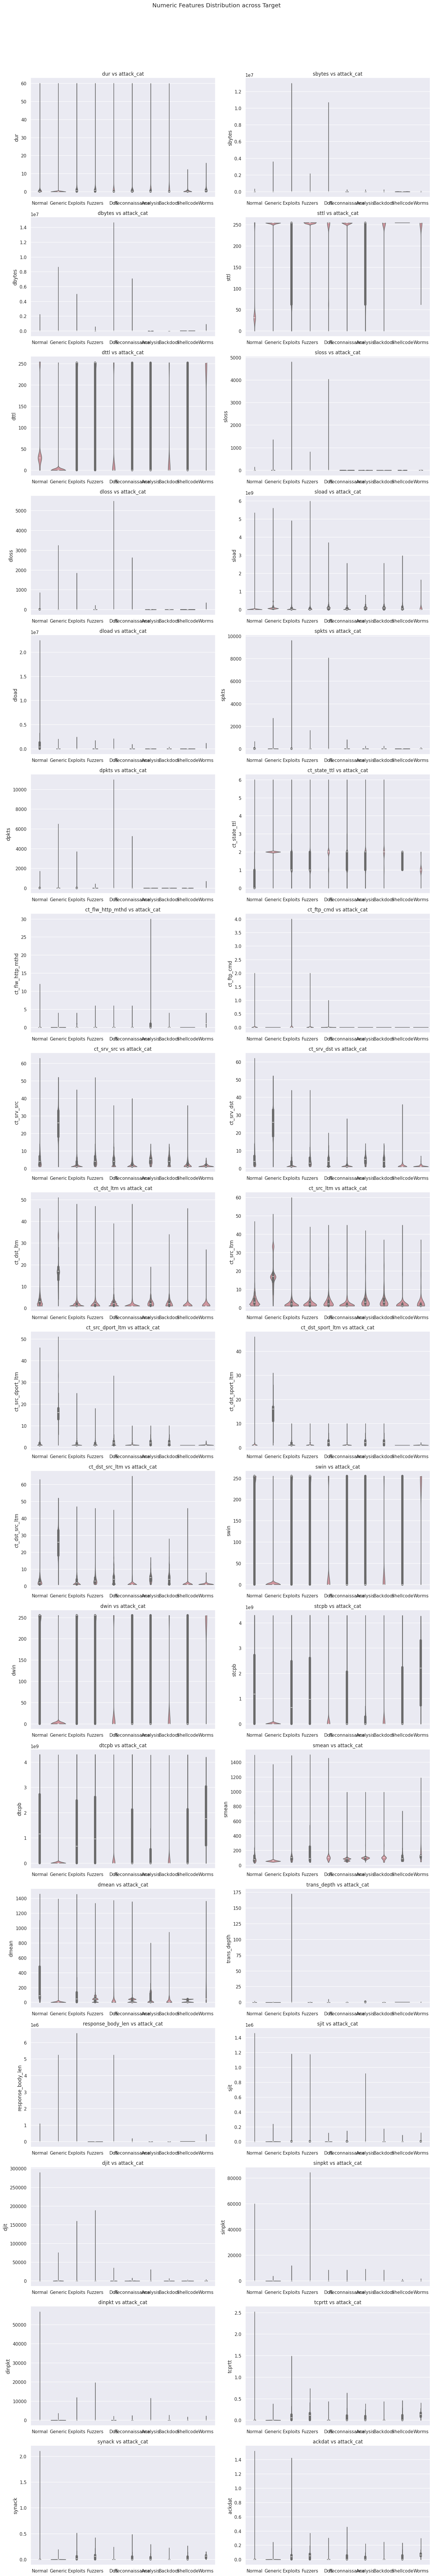

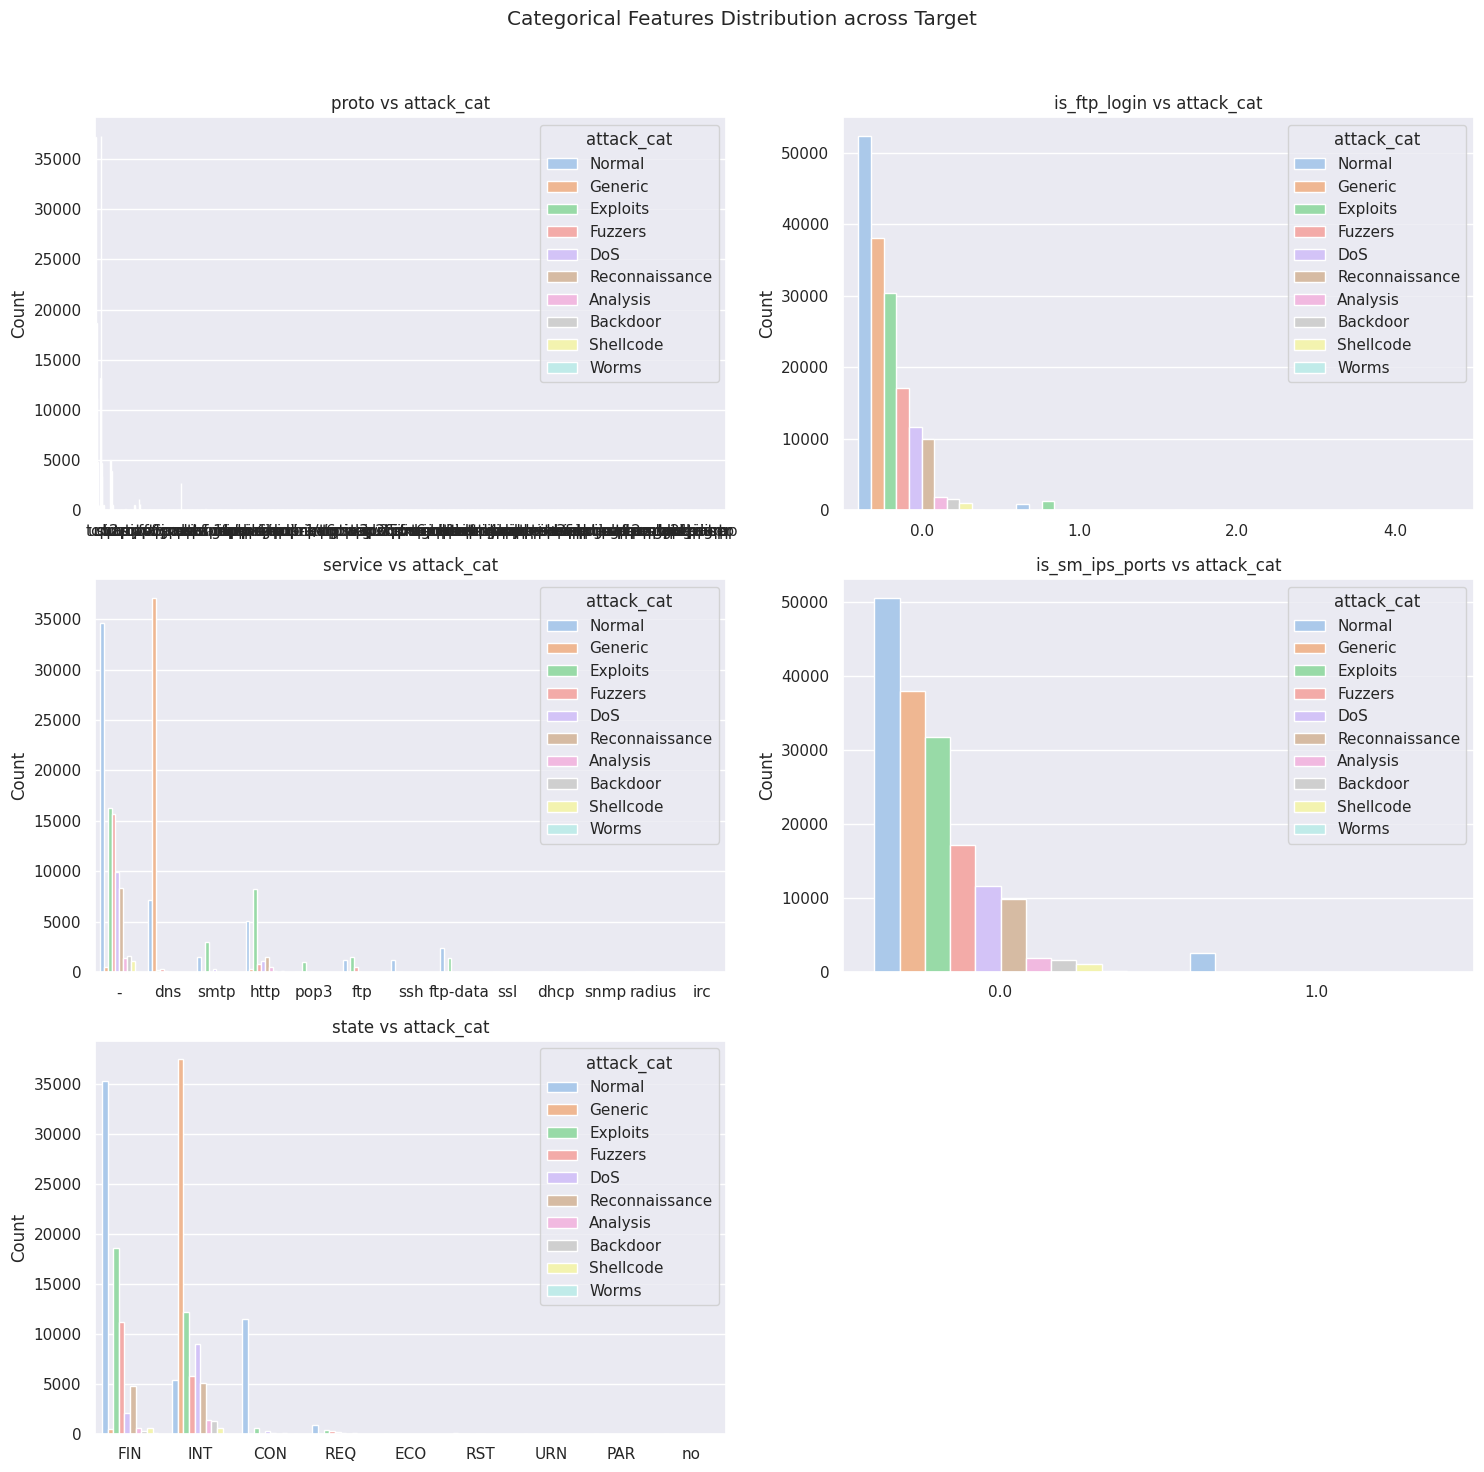

In [ ]:
# CORRELATION BETWEEN FEATURES N TARGET
target = 'attack_cat'

numerical_data = [feat for feat in numerical_data if feat != target]
categorical_data = [feat for feat in categorical_data if feat != target]

# Numerical Data Plot
num_columns = 2
num_rows_numeric = math.ceil(len(numerical_data) / num_columns)
fig, axes = plt.subplots(num_rows_numeric, num_columns, figsize=(15, 5 * num_rows_numeric), squeeze=False)
fig.suptitle('Numeric Features Distribution across Target')

idx = 0
for feature in numerical_data:
    ax = axes[idx // num_columns, idx % num_columns]
    sns.violinplot(ax=ax, x=target, y=feature, data=df_train, cut=0, color='#d88b98')
    ax.set_title(f'{feature} vs {target}')
    ax.set_xlabel('')
    ax.set_ylabel(feature)
    idx += 1

# Hide empty subplots if any
for i in range(idx, num_rows_numeric * num_columns):
    axes[i // num_columns, i % num_columns].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Categorical Data Plot
num_rows_categorical = math.ceil(len(categorical_data) / num_columns)
fig, axes = plt.subplots(num_rows_categorical, num_columns, figsize=(15, 5 * num_rows_categorical), squeeze=False)
fig.suptitle('Categorical Features Distribution across Target')

idx = 0
for feature in categorical_data:
    ax = axes[idx // num_columns, idx % num_columns]
    sns.countplot(ax=ax, x=feature, hue=target, data=df_train, palette="pastel")
    ax.set_title(f'{feature} vs {target}')
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.legend(title=target, loc='upper right')
    idx += 1

for i in range(idx, num_rows_categorical * num_columns):
    axes[i // num_columns, i % num_columns].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

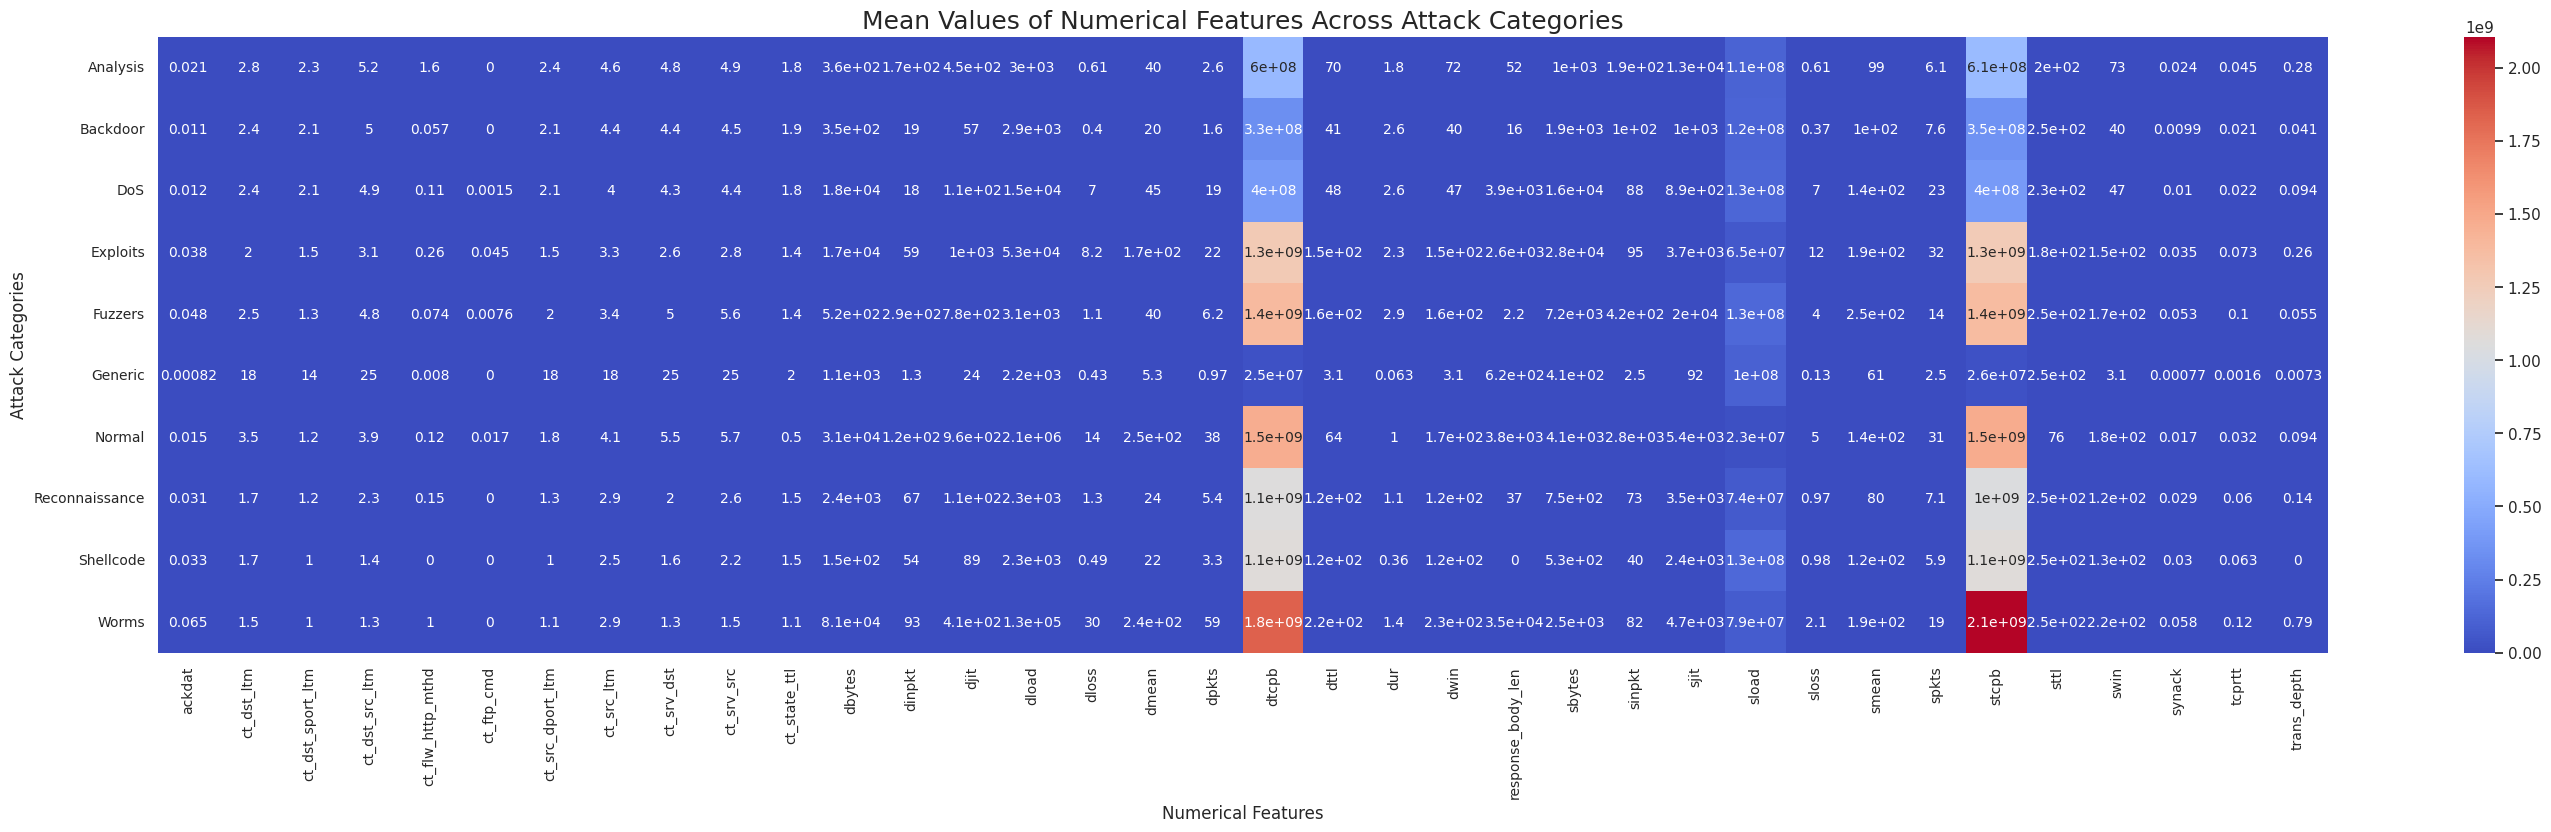

In [ ]:
# NUMERICAL DATA
pivot_table = df_train.pivot_table(index='attack_cat', values=numerical_data, aggfunc='mean')

plt.figure(figsize=(35, 8))

sns.heatmap(pivot_table, annot=True, fmt=".2g", cmap='coolwarm', annot_kws={"size": 10})

plt.title('Mean Values of Numerical Features Across Attack Categories', fontsize=18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10, rotation=0)
plt.xlabel('Numerical Features', fontsize=12)
plt.ylabel('Attack Categories', fontsize=12)

plt.colorbar(cax, label='Scale')

plt.show()

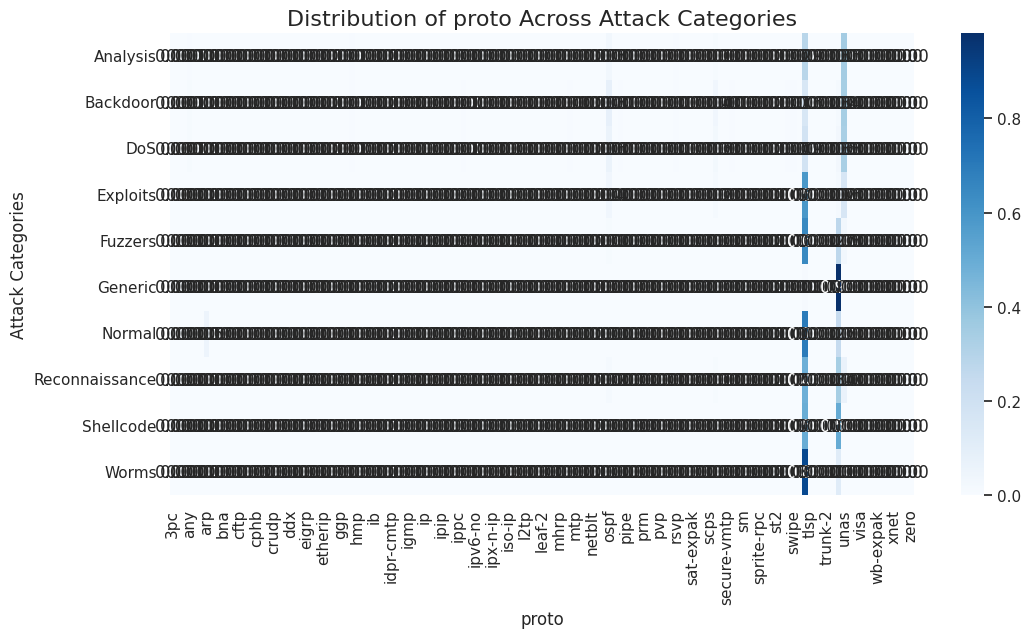

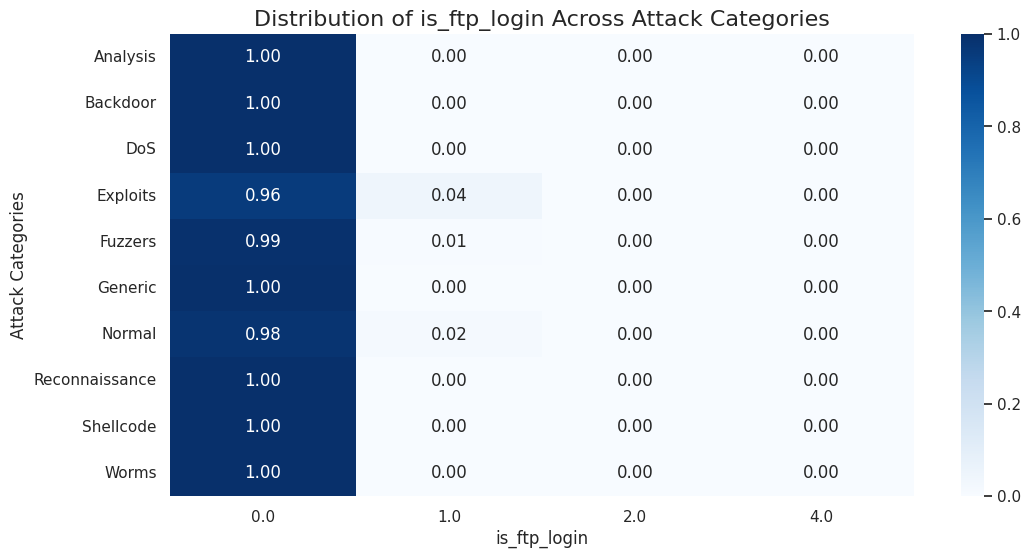

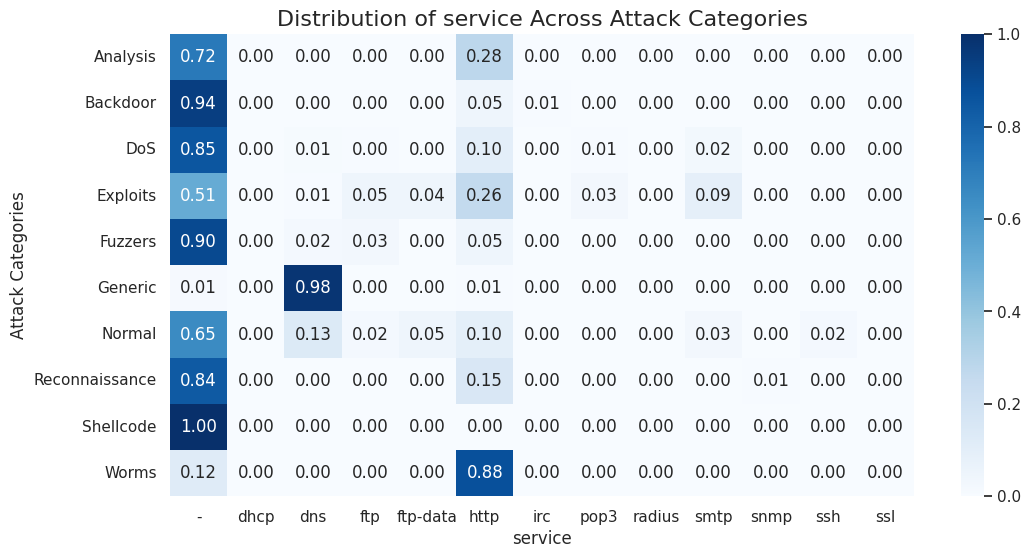

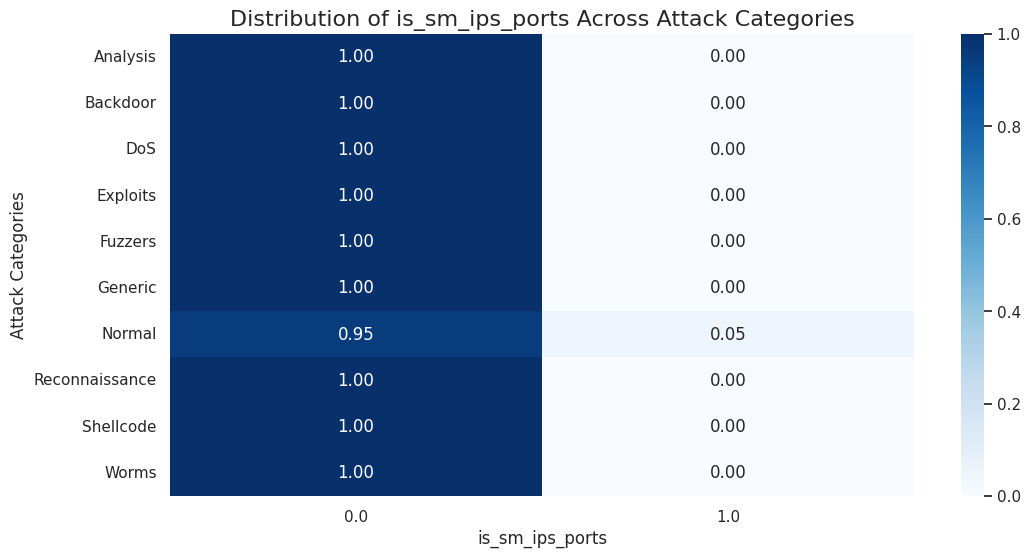

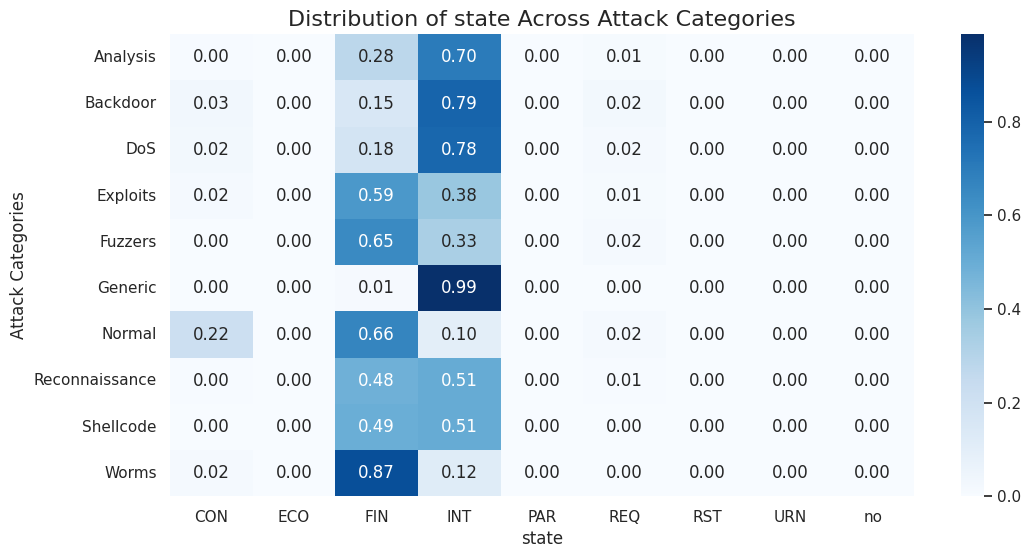

In [ ]:
# CATEGORICAL DATA

categorical_data2 = [col for col in categorical_data if col not in ['attack_cat'] and not col.endswith('_binned')]
for feature in categorical_data2:
    # Create a normalized frequency table
    table = pd.crosstab(index=df_train['attack_cat'], columns=df_train[feature], normalize='index')
    plt.figure(figsize=(12, 6))
    sns.heatmap(table, annot=True, cmap='Blues', fmt=".2f")
    plt.title(f'Distribution of {feature} Across Attack Categories', fontsize=16)
    plt.xlabel(feature)
    plt.ylabel('Attack Categories')
    plt.show()

# 1. Split Training Set and Validation Set

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.

Note: For training, you should use the data contained in the `train` folder given by the TA. The `test` data is only used for kaggle submission.

In [ ]:
target_col = ['attack_cat']

num_columns = [col for col in df_train.columns
               if col not in categorical_data + target_col + ['id']]

X = df_train.drop(target_col, axis=1)
y = df_train[target_col]

X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.2,  # 80% training, 20% test
    random_state=42,
    stratify=y
)

print(f"Training Set Size: {X_train.shape}, Test Set Size: {X_val.shape}")

# Optional: Save splits
# X_train.to_csv('X_train_holdout.csv', index=False)
# y_train.to_csv('y_train_holdout.csv', index=False)
# X_val.to_csv('X_val.csv', index=False)
# y_val.to_csv('y_val.csv', index=False)

Training Set Size: (140272, 41), Test Set Size: (35069, 41)


# 2. Data Cleaning and Preprocessing

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is **seldom ready for training**, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

We will give some common methods for you to try, but you only have to **at least implement one method for each process**. For each step that you will do, **please explain the reason why did you do that process. Write it in a markdown cell under the code cell you wrote.**

## A. Data Cleaning

**Data cleaning** is the crucial first step in preparing your dataset for machine learning. Raw data collected from various sources is often messy and may contain errors, missing values, and inconsistencies. Data cleaning involves the following steps:

1. **Handling Missing Data:** Identify and address missing values in the dataset. This can include imputing missing values, removing rows or columns with excessive missing data, or using more advanced techniques like interpolation.

2. **Dealing with Outliers:** Identify and handle outliers, which are data points significantly different from the rest of the dataset. Outliers can be removed or transformed to improve model performance.

3. **Data Validation:** Check for data integrity and consistency. Ensure that data types are correct, categorical variables have consistent labels, and numerical values fall within expected ranges.

4. **Removing Duplicates:** Identify and remove duplicate rows, as they can skew the model's training process and evaluation metrics.

5. **Feature Engineering**: Create new features or modify existing ones to extract relevant information. This step can involve scaling, normalizing, or encoding features for better model interpretability.

### I. Handling Missing Data

Missing data can adversely affect the performance and accuracy of machine learning models. There are several strategies to handle missing data in machine learning:

1. **Data Imputation:**

    a. **Mean, Median, or Mode Imputation:** For numerical features, you can replace missing values with the mean, median, or mode of the non-missing values in the same feature. This method is simple and often effective when data is missing at random.

    b. **Constant Value Imputation:** You can replace missing values with a predefined constant value (e.g., 0) if it makes sense for your dataset and problem.

    c. **Imputation Using Predictive Models:** More advanced techniques involve using predictive models to estimate missing values. For example, you can train a regression model to predict missing numerical values or a classification model to predict missing categorical values.

2. **Deletion of Missing Data:**

    a. **Listwise Deletion:** In cases where the amount of missing data is relatively small, you can simply remove rows with missing values from your dataset. However, this approach can lead to a loss of valuable information.

    b. **Column (Feature) Deletion:** If a feature has a large number of missing values and is not critical for your analysis, you can consider removing that feature altogether.

3. **Domain-Specific Strategies:**

    a. **Domain Knowledge:** In some cases, domain knowledge can guide the imputation process. For example, if you know that missing values are related to a specific condition, you can impute them accordingly.

4. **Imputation Libraries:**

    a. **Scikit-Learn:** Scikit-Learn provides a `SimpleImputer` class that can handle basic imputation strategies like mean, median, and mode imputation.

    b. **Fancyimpute:** Fancyimpute is a Python library that offers more advanced imputation techniques, including matrix factorization, k-nearest neighbors, and deep learning-based methods.

The choice of imputation method should be guided by the nature of your data, the amount of missing data, the problem you are trying to solve, and the assumptions you are willing to make.

In [ ]:
def handle_missing_values(x_train):
    # Define feature groups
    feature_groups = {
        'categorical': ['proto', 'service', 'state'],
        'binary': ['is_sm_ips_ports', 'is_ftp_login'],
        'count': ['ct_state_ttl', 'ct_flw_http_mthd', 'ct_ftp_cmd',
                  'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm',
                  'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm'],
        'network': ['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss',
                    'dloss', 'sload', 'dload', 'spkts', 'dpkts'],
        'tcp': ['swin', 'dwin', 'stcpb', 'dtcpb', 'smean', 'dmean',
                'trans_depth', 'response_body_len', 'sjit', 'djit',
                'sinpkt', 'dinpkt', 'tcprtt', 'synack', 'ackdat']
    }

    # Create a copy of the input data to prevent modifying the original DataFrame
    X_processed = x_train.copy()

    # Apply imputations for each group of features
    for group, features in feature_groups.items():
        if group in ['categorical', 'binary']:
            imputer = SimpleImputer(strategy='most_frequent')
        else:
            imputer = SimpleImputer(strategy='median')

        if features:  # If features exist in the group
            X_processed[features] = imputer.fit_transform(X_processed[features])

    # Return the processed data with imputed values
    return X_processed

In [ ]:
# # CHECK MISSING VALUES MASIH ADA/TIDAK DI TRAINING SET

# # X_train (non-target)
# missing_counts_X_train = X_train.isnull().sum()
# missing_percentage_X_train = (missing_counts_X_train / len(X_train)) * 100
# missing_summary_X_train = pd.DataFrame({
#     'Missing Values': missing_counts_X_train,
#     'Percentage': missing_percentage_X_train
# })

# print("\n----- Missing Values di X_train -----:")
# display(missing_summary_X_train)

# # y_train (target)
# if isinstance(y_train, pd.Series):
#     missing_counts_y_train = y_train.isnull().sum()
#     missing_percentage_y_train = (missing_counts_y_train / len(y_train)) * 100
#     missing_summary_y_train = pd.DataFrame({
#         'Missing Values': [missing_counts_y_train],
#         'Percentage': [missing_percentage_y_train]
#     })
# else:
#     missing_counts_y_train = y_train.isnull().sum()
#     missing_percentage_y_train = (missing_counts_y_train / len(y_train)) * 100
#     missing_summary_y_train = pd.DataFrame({
#         'Missing Values': missing_counts_y_train,
#         'Percentage': missing_percentage_y_train
#     })

# print("\n----- Missing Values di y_train -----:")
# display(missing_summary_y_train)


**Alasan Pemilihan Method**

Semua fitur memiliki sekitar 5% data yang hilang, dengan target variable (attack_cat) yang tidak memiliki missing values. Berdasarkan analisis ini, metode yang digunakan adalah imputation, bukan deletion. Alasan utama pemilihan ini adalah karena persentase missing values yang tidak terlalu tinggi (sekitar 5%), dan juga karena missing values tersebar merata di banyak fitur. Kalau pakai deletion, akan banyak data hilang.

Implementasi imputation menggunakan strategi yang berbeda berdasarkan tipe data. Pada data kategorikal (state, service, proto) dan data binary (is_sm_ips_ports, is_ftp_login), menggunakan Most Frequent (Mode) Imputation. Metode ini dipilih karena dapat menjaga distribusi kategori yang sudah ada dan cocok untuk data yang bersifat diskrit. Khusus untuk data binary, penggunaan nilai yang paling umum adalah pendekatan yang masuk akal karena hanya ada dua nilai.

Sementara itu, untuk data counter (seperti ct_state_ttl, ct_srv_src), data traffic network (bytes, packets, load), dan data TCP (window sizes, timing), menggunakan Median Imputation. Pemilihan median sebagai metode imputation untuk ketiga jenis data ini didasarkan pada karakteristik data yang cenderung memiliki outlier dan tidak terdistribusi normal.

### II. Dealing with Outliers

Outliers are data points that significantly differ from the majority of the data. They can be unusually high or low values that do not fit the pattern of the rest of the dataset. Outliers can significantly impact model performance, so it is important to handle them properly.

Some methods to handle outliers:
1. **Imputation**: Replace with mean, median, or a boundary value.
2. **Clipping**: Cap values to upper and lower limits.
3. **Transformation**: Use log, square root, or power transformations to reduce their influence.
4. **Model-Based**: Use algorithms robust to outliers (e.g., tree-based models, Huber regression).

In [ ]:
# Transformer to handle outliers in both numerical and categorical features
class OutlierHandler(BaseEstimator, TransformerMixin):
    def __init__(self, numerical_outlier_threshold=1.5, categorical_threshold=0.01):
        # Define thresholds for handling outliers in numerical and categorical features
        self.numerical_outlier_threshold = numerical_outlier_threshold
        self.categorical_threshold = categorical_threshold

    def fit(self, X, y=None):
        # Fit function doesn't perform any specific learning; it's a placeholder
        return self

    def transform(self, X):
        X_processed = X.copy()

        # Handle numerical features (except binary ones)
        numerical_features = [col for col in X_processed.columns if X_processed[col].dtype == 'float64' and col not in ['is_sm_ips_ports', 'is_ftp_login', 'service']]

        for col in numerical_features:
            if col in X_processed.columns:
                # Calculate IQR for outlier detection
                Q1 = X_processed[col].quantile(0.25)
                Q3 = X_processed[col].quantile(0.75)
                IQR = Q3 - Q1
                lower = Q1 - self.numerical_outlier_threshold * IQR
                upper = Q3 + self.numerical_outlier_threshold * IQR
                # Clip outliers
                X_processed[col] = X_processed[col].clip(lower, upper)
                # Apply log transformation for skewed data (optional)
                X_processed[col] = np.log1p(X_processed[col])

        # Handle categorical features (replace rare categories with 'Other')
        categorical_features = X_processed.select_dtypes(include=['object']).columns
        for col in categorical_features:
            value_counts = X_processed[col].value_counts(normalize=True)
            rare_categories = value_counts[value_counts < self.categorical_threshold].index
            # Replace rare categories with 'Other'
            X_processed[col] = X_processed[col].replace(rare_categories, 'Other')

        return X_processed

In [ ]:
# # Apply to X_train and y_train
# X_train_processed, y_train_processed = handle_outliers(X_train, y_train)
# df_processed = pd.concat([X_train_processed, y_train_processed], axis=1)
# # print(y_train_processed)

# # Numerical features
# numerical_features = [col for col in X_train.columns if col not in categorical_data]
# num_verification = num_outliers_handled(X_train, X_train_processed, numerical_features)

# # Categorical features
# categorical_features = [col for col in categorical_data if col != 'id']
# cat_verification = cat_outliers_handled(X_train, X_train_processed, categorical_features)

# # Display verification results
# print("\n----- NUMERICAL FEATURES VERIFICATION -----")
# display(num_verification)

# # print("\n----- CATEGORICAL FEATURES VERIFICATION -----")
# # for feature, comparison in cat_verification.items():
# #     print(f"\nChanges in {feature}:")
# #     display(comparison[comparison['Count_Change'] != 0])


**Alasan Pemilihan Method**

Pada fitur kategorikal, menggunakan metode penanganan kategori rare, di mana  kategori yang memiliki proporsi < 1% menjadi kategori 'Other'. Tujuannya untuk mengurangi dimensi data dan menghindari overfitting yang mungkin disebabkan oleh kategori yang sangat jarang muncul.

Untuk fitur numerik, dibagi menjadi beberapa kelompok berdasarkan karakteristiknya: fitur waktu, fitur byte, fitur paket, fitur hitungan, dan fitur TCP. Untuk fitur waktu seperti durasi (dur) dan jitter (sjit, djit), menggunakan metode percentile-based clipping dengan rentang 1%-99% diikuti dengan transformasi logaritmik. Pendekatan ini tepat karena data waktu sering memiliki distribusi yang skewed dan nilai ekstrim yang sangat tinggi.

Pada fitur byte dan paket, menggunakan metode IQR dengan batas 1.5 kali IQR dari Q1 dan Q3. Untuk fitur byte, menambahkan transformasi logaritmik setelah clipping, yang masuk akal mengingat data byte sering memiliki variasi nilai yang sangat besar. juga memastikan nilai tidak negatif dengan menggunakan max(0, lower) sebagai batas bawah.

Untuk fitur count (ct_*), menggunakan pendekatan yang mirip dengan IQR, namun menambahkan transformasi akar kuadrat. Transformasi ini membantu menstabilkan variansi. Sementara untuk fitur TCP, hanya melakukan clipping pada nilai negatif karena fitur-fitur ini sudah memiliki rentang nilai yang relatif stabil. Fitur numerik sisanya ditangani dengan metode IQR standar.

### III. Remove Duplicates
Handling duplicate values is crucial because they can compromise data integrity, leading to inaccurate analysis and insights. Duplicate entries can bias machine learning models, causing overfitting and reducing their ability to generalize to new data. They also inflate the dataset size unnecessarily, increasing computational costs and processing times. Additionally, duplicates can distort statistical measures and lead to inconsistencies, ultimately affecting the reliability of data-driven decisions and reporting. Ensuring data quality by removing duplicates is essential for accurate, efficient, and consistent analysis.

In [ ]:
def handle_dup(X_train, y_train):
    if isinstance(y_train, pd.Series):
        y_train = y_train.to_frame()

    df_combined = pd.concat([X_train, y_train], axis=1)

    df_processed = df_combined.copy()

    initial_rows = len(df_processed)

    exact_duplicates = df_processed.duplicated().sum()

    duplicate_rows = df_processed[df_processed.duplicated(keep='first')]

    df_processed = df_processed.drop_duplicates(keep='first')

    target_col = y_train.columns[0] if isinstance(y_train, pd.DataFrame) else y_train.name
    X_processed = df_processed.drop(target_col, axis=1)
    y_processed = df_processed[target_col]

    return X_processed, y_processed

**Alasan Pemilihan Method**

Menghapus semua data duplikat dengan mempertahankan kemunculan pertama dari setiap data. Hasil analisis kemudian disimpan dalam dictionary yang berisi informasi penting seperti jumlah baris awal, jumlah duplikat yang ditemukan, jumlah baris setelah penghapusan, total baris yang dihapus, dan contoh baris duplikat.

Dari aspek konsistensi data, mempertahankan entry pertama sering kali lebih aman karena data pertama cenderung memiliki kualitas yang lebih baik, belum mengalami proses duplikasi yang mungkin menimbulkan error atau modifikasi tidak diinginkan.

Sementara itu, penyimpanan informasi detail dalam dictionary membantu dalam dokumentasi proses pembersihan data, memungkinkan melakukan tracking perubahan yang terjadi pada dataset, dan memvalidasi bahwa proses pembersihan data berjalan sesuai dengan yang diharapkan.

### IV. Feature Engineering

**Feature engineering** involves creating new features (input variables) or transforming existing ones to improve the performance of machine learning models. Feature engineering aims to enhance the model's ability to learn patterns and make accurate predictions from the data. It's often said that "good features make good models."

1. **Feature Selection:** Feature engineering can involve selecting the most relevant and informative features from the dataset. Removing irrelevant or redundant features not only simplifies the model but also reduces the risk of overfitting.

2. **Creating New Features:** Sometimes, the existing features may not capture the underlying patterns effectively. In such cases, engineers create new features that provide additional information. For example:
   
   - **Polynomial Features:** Engineers may create new features by taking the square, cube, or other higher-order terms of existing numerical features. This can help capture nonlinear relationships.
   
   - **Interaction Features:** Interaction features are created by combining two or more existing features. For example, if you have features "length" and "width," you can create an "area" feature by multiplying them.

3. **Binning or Discretization:** Continuous numerical features can be divided into bins or categories. For instance, age values can be grouped into bins like "child," "adult," and "senior."

4. **Domain-Specific Feature Engineering:** Depending on the domain and problem, engineers may create domain-specific features. For example, in fraud detection, features related to transaction history and user behavior may be engineered to identify anomalies.

Feature engineering is both a creative and iterative process. It requires a deep understanding of the data, domain knowledge, and experimentation to determine which features will enhance the model's predictive power.

# Feature Selection
Remove unrelevant features

In [ ]:
def drop_unrelevant_feat(X_train):
    columns_to_remove = [
      'dur', 'sloss', 'sload', 'dload', 'dpkts',
      'ct_srv_dst', 'ct_dst_ltm', 'ct_dst_sport_ltm',
      'swin', 'dtcpb', 'smean', 'djit', 'dinpkt', 'synack', 'ackdat'
    ]

    X_train_copy = X_train.copy()
    return X_train_copy.drop(columns=columns_to_remove)

In [ ]:
X_train_imputed = handle_missing_values(X_train)
X_val_imputed = handle_missing_values(X_val)

In [ ]:
outlier_handler = OutlierHandler(numerical_outlier_threshold=1.5, categorical_threshold=0.01)
X_train_no_outliers = outlier_handler.fit_transform(X_train_imputed)
X_val_no_outliers = outlier_handler.transform(X_val_imputed)

In [ ]:

X_train_no_duplicates, y_train_no_duplicates = handle_dup(X_train_no_outliers, y_train)
X_val_no_duplicates, y_val_no_duplicates = handle_dup(X_val_no_outliers, y_val)

In [ ]:

X_train_essentials = drop_unrelevant_feat(X_train_no_duplicates)
X_val_essentials = drop_unrelevant_feat(X_val_no_duplicates)

y_train_essentials = y_train_no_duplicates
y_val_essentials = y_val_no_duplicates

In [ ]:
print(X_train_essentials.shape)
print(y_train_essentials.shape)
print(X_val_essentials.shape)
print(y_val_essentials.shape)

(113587, 17)
(113587,)
(30784, 17)
(30784,)


## B. Data Preprocessing

**Data preprocessing** is a broader step that encompasses both data cleaning and additional transformations to make the data suitable for machine learning algorithms. Its primary goals are:

1. **Feature Scaling:** Ensure that numerical features have similar scales. Common techniques include Min-Max scaling (scaling to a specific range) or standardization (mean-centered, unit variance).

2. **Encoding Categorical Variables:** Machine learning models typically work with numerical data, so categorical variables need to be encoded. This can be done using one-hot encoding, label encoding, or more advanced methods like target encoding.

3. **Handling Imbalanced Classes:** If dealing with imbalanced classes in a binary classification task, apply techniques such as oversampling, undersampling, or using different evaluation metrics to address class imbalance.

4. **Dimensionality Reduction:** Reduce the number of features using techniques like Principal Component Analysis (PCA) or feature selection to simplify the model and potentially improve its performance.

5. **Normalization:** Normalize data to achieve a standard distribution. This is particularly important for algorithms that assume normally distributed data.

In [ ]:
print("Skewness of each column in numerical:")
for column in num_columns:
  try:
    print(column, ":", X_train_essentials[column].skew())
  except:
    pass

Skewness of each column in numerical:
dbytes : -0.4879306719064202
sttl : -1.320184625249292
sload : -0.10331340393203435
spkts : 0.15302795728197532
ct_state_ttl : -0.4181339397212406
ct_ftp_cmd : 0.0
ct_srv_src : 0.468790719922507
ct_src_dport_ltm : 1.4924892610823928
dtcpb : -0.09918978718461985
dmean : -0.5274910988015478
response_body_len : 0.0
tcprtt : 0.9301316424063395


### Notes on Preprocessing processes

It is advised to create functions or classes that have the same/similar type of inputs and outputs, so you can add, remove, or swap the order of the processes easily. You can implement the functions or classes by yourself

or

use `sklearn` library. To create a new preprocessing component in `sklearn`, implement a corresponding class that includes:
1. Inheritance to `BaseEstimator` and `TransformerMixin`
2. The method `fit`
3. The method `transform`

### I. Feature Scaling

**Feature scaling** is a preprocessing technique used in machine learning to standardize the range of independent variables or features of data. The primary goal of feature scaling is to ensure that all features contribute equally to the training process and that machine learning algorithms can work effectively with the data.

Here are the main reasons why feature scaling is important:

1. **Algorithm Sensitivity:** Many machine learning algorithms are sensitive to the scale of input features. If the scales of features are significantly different, some algorithms may perform poorly or take much longer to converge.

2. **Distance-Based Algorithms:** Algorithms that rely on distances or similarities between data points, such as k-nearest neighbors (KNN) and support vector machines (SVM), can be influenced by feature scales. Features with larger scales may dominate the distance calculations.

3. **Regularization:** Regularization techniques, like L1 (Lasso) and L2 (Ridge) regularization, add penalty terms based on feature coefficients. Scaling ensures that all features are treated equally in the regularization process.

Common methods for feature scaling include:

1. **Min-Max Scaling (Normalization):** This method scales features to a specific range, typically [0, 1]. It's done using the following formula:

   $$X' = \frac{X - X_{min}}{X_{max} - X_{min}}$$

   - Here, $X$ is the original feature value, $X_{min}$ is the minimum value of the feature, and $X_{max}$ is the maximum value of the feature.  
<br />
<br />
2. **Standardization (Z-score Scaling):** This method scales features to have a mean (average) of 0 and a standard deviation of 1. It's done using the following formula:

   $$X' = \frac{X - \mu}{\sigma}$$

   - $X$ is the original feature value, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.  
<br />
<br />
3. **Robust Scaling:** Robust scaling is a method that scales features to the interquartile range (IQR) and is less affected by outliers. It's calculated as:

   $$X' = \frac{X - Q1}{Q3 - Q1}$$

   - $X$ is the original feature value, $Q1$ is the first quartile (25th percentile), and $Q3$ is the third quartile (75th percentile) of the feature.  
<br />
<br />
4. **Log Transformation:** In cases where data is highly skewed or has a heavy-tailed distribution, taking the logarithm of the feature values can help stabilize the variance and improve scaling.

The choice of scaling method depends on the characteristics of your data and the requirements of your machine learning algorithm. **Min-max scaling and standardization are the most commonly used techniques and work well for many datasets.**

Scaling should be applied separately to each training and test set to prevent data leakage from the test set into the training set. Additionally, **some algorithms may not require feature scaling, particularly tree-based models.**

In [ ]:
class FeatureScaler(BaseEstimator, TransformerMixin):
    def __init__(self, scaling_method='standard'):
        self.scaling_method = scaling_method
        self.categorical_features = ['state', 'service', 'proto']
        self.binary_features = ['is_sm_ips_ports', 'is_ftp_login']
        self.scaler = None

    def fit(self, X, y=None):
        if self.scaling_method == 'minmax':
            self.scaler = MinMaxScaler()
        elif self.scaling_method == 'standard':
            self.scaler = StandardScaler()
        elif self.scaling_method == 'robust':
            self.scaler = RobustScaler()
        else:
            raise ValueError("Scaling method must be 'minmax', 'standard', or 'robust'")

        self.numerical_features = [col for col in X.columns if col not in self.categorical_features + self.binary_features]

        if len(self.numerical_features) > 0:
            self.scaler.fit(X[self.numerical_features])

        return self

    def transform(self, X):
        X_transformed = X.copy()

        if len(self.numerical_features) > 0:
            X_transformed[self.numerical_features] = self.scaler.transform(X[self.numerical_features])

        return X_transformed

### II. Feature Encoding

**Feature encoding**, also known as **categorical encoding**, is the process of converting categorical data (non-numeric data) into a numerical format so that it can be used as input for machine learning algorithms. Most machine learning models require numerical data for training and prediction, so feature encoding is a critical step in data preprocessing.

Categorical data can take various forms, including:

1. **Nominal Data:** Categories with no intrinsic order, like colors or country names.  

2. **Ordinal Data:** Categories with a meaningful order but not necessarily equidistant, like education levels (e.g., "high school," "bachelor's," "master's").

There are several common methods for encoding categorical data:

1. **Label Encoding:**

   - Label encoding assigns a unique integer to each category in a feature.
   - It's suitable for ordinal data where there's a clear order among categories.
   - For example, if you have an "education" feature with values "high school," "bachelor's," and "master's," you can encode them as 0, 1, and 2, respectively.
<br />
<br />
2. **One-Hot Encoding:**

   - One-hot encoding creates a binary (0 or 1) column for each category in a nominal feature.
   - It's suitable for nominal data where there's no inherent order among categories.
   - Each category becomes a new feature, and the presence (1) or absence (0) of a category is indicated for each row.
<br />
<br />
3. **Target Encoding (Mean Encoding):**

   - Target encoding replaces each category with the mean of the target variable for that category.
   - It's often used for classification problems.

In [ ]:
class CategoricalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, encoding_method='onehot', categorical_features=None):
        self.encoding_method = encoding_method.lower()
        self.categorical_features = categorical_features or ['state', 'service', 'proto']
        self.encoders = {}
        self.encoded_features = {}

    def fit(self, X, y=None):
        X = X.copy()

        if self.encoding_method == 'label':
            for feature in self.categorical_features:
                if feature in X.columns:
                    le = LabelEncoder()
                    le.fit(X[feature].astype(str))
                    self.encoders[feature] = le

        elif self.encoding_method == 'onehot':
            for feature in self.categorical_features:
                if feature in X.columns:
                    categories = X[feature].unique()
                    self.encoded_features[feature] = [f"{feature}_{cat}" for cat in categories]

        elif self.encoding_method == 'target':
            if y is None:
                raise ValueError("Target encoding requires target values (y)")

            for feature in self.categorical_features:
                if feature in X.columns:
                    target_means = X.groupby(feature)[y.name].mean()
                    self.encoders[feature] = target_means

        else:
            raise ValueError("Encoding method must be 'label', 'onehot', or 'target'")

        return self

    def transform(self, X):
        X = X.copy()

        if self.encoding_method == 'label':
            for feature, encoder in self.encoders.items():
                if feature in X.columns:
                    X[feature] = encoder.transform(X[feature].astype(str))

        elif self.encoding_method == 'onehot':
            for feature in self.categorical_features:
                if feature in X.columns:
                    # Create dummy variables
                    dummies = pd.get_dummies(X[feature], prefix=feature)
                    # Add missing columns if any
                    for col in self.encoded_features[feature]:
                        if col not in dummies.columns:
                            dummies[col] = 0
                    dummies = dummies[self.encoded_features[feature]]
                    X = pd.concat([X.drop(columns=[feature]), dummies], axis=1)

        elif self.encoding_method == 'target':
            for feature, target_means in self.encoders.items():
                if feature in X.columns:
                    X[feature] = X[feature].map(target_means)
                    X[feature].fillna(target_means.mean(), inplace=True)

        return X

### III. Handling Imbalanced Dataset

**Handling imbalanced datasets** is important because imbalanced data can lead to several issues that negatively impact the performance and reliability of machine learning models. Here are some key reasons:

1. **Biased Model Performance**:

 - Models trained on imbalanced data tend to be biased towards the majority class, leading to poor performance on the minority class. This can result in misleading accuracy metrics.

2. **Misleading Accuracy**:

 - High overall accuracy can be misleading in imbalanced datasets. For example, if 95% of the data belongs to one class, a model that always predicts the majority class will have 95% accuracy but will fail to identify the minority class.

3. **Poor Generalization**:

 - Models trained on imbalanced data may not generalize well to new, unseen data, especially if the minority class is underrepresented.


Some methods to handle imbalanced datasets:
1. **Resampling Methods**:

 - Oversampling: Increase the number of instances in the minority class by duplicating or generating synthetic samples (e.g., SMOTE).
 - Undersampling: Reduce the number of instances in the majority class to balance the dataset.

2. **Evaluation Metrics**:

 - Use appropriate evaluation metrics such as precision, recall, F1-score, ROC-AUC, and confusion matrix instead of accuracy to better assess model performance on imbalanced data.

3. **Algorithmic Approaches**:

 - Use algorithms that are designed to handle imbalanced data, such as decision trees, random forests, or ensemble methods.
 - Adjust class weights in algorithms to give more importance to the minority class.

In [ ]:
# Write your code here

### IV. Data Normalization

Data normalization is used to achieve a standard distribution. Without normalization, models or processes that rely on the assumption of normality may not work correctly. Normalization helps reduce the magnitude effect and ensures numerical stability during optimization.

In [ ]:
# Write your code here

### V. Dimensionality Reduction

Dimensionality reduction is a technique used in data preprocessing to reduce the number of input features (dimensions) in a dataset while retaining as much important information as possible. It is essential when dealing with high-dimensional data, where too many features can cause problems like increased computational costs, overfitting, and difficulty in visualization. Reducing dimensions simplifies the data, making it easier to analyze and improving the performance of machine learning models.

One of the main approaches to dimensionality reduction is feature extraction. Feature extraction creates new, smaller sets of features that capture the essence of the original data. Common techniques include:

1. **Principal Component Analysis (PCA)**: Converts correlated features into a smaller number of uncorrelated "principal components."
2. **t-SNE (t-Distributed Stochastic Neighbor Embedding)**: A visualization-focused method to project high-dimensional data into 2D or 3D spaces.
3. **Autoencoders**: Neural networks that learn compressed representations of the data.

In [ ]:
# Write your code here

# 3. Compile Preprocessing Pipeline

All of the preprocessing classes or functions defined earlier will be compiled in this step.

If you use sklearn to create preprocessing classes, you can list your preprocessing classes in the Pipeline object sequentially, and then fit and transform your data.

In [ ]:
numeric_cols = X_train_essentials.select_dtypes(include=['float64']).columns
categorical_cols = X_train_essentials.select_dtypes(include=['object']).columns

In [ ]:
# Numerical and categorical preprocessing pipelines
numerical_pipeline = Pipeline([
    ('power_transform', PowerTransformer(standardize=True)),  # Handle skewed features
    ('scaler', RobustScaler())  # Scale features using RobustScaler
])

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False, min_frequency=0.01))  # One-Hot Encoding
])

preprocessor = ColumnTransformer([
    ("num", numerical_pipeline, numeric_cols),
    ("cat", categorical_pipeline, categorical_cols)
])

def scale_features(X_train, X_val, scaling_method='standard'):
    scaler = FeatureScaler(scaling_method=scaling_method)

    X_train_scaled = scaler.fit_transform(X_train)

    X_val_scaled = scaler.transform(X_val)

    return X_train_scaled, X_val_scaled, scaler

def prepare_scaled_data(X_train, X_val):
    # kNN -> MinMax scaling
    X_train_knn, X_val_knn, scaler_knn = scale_features(
        X_train, X_val, scaling_method='minmax'
    )

    # Naive Bayes -> Standard scaling
    X_train_nb, X_val_nb, scaler_nb = scale_features(
        X_train, X_val, scaling_method='standard'
    )

    # ID3 -> No scaling
    X_train_id3, X_val_id3 = X_train.copy(), X_val.copy()

    return {
        'kNN': (X_train_knn, X_val_knn, scaler_knn),
        'NaiveBayes': (X_train_nb, X_val_nb, scaler_nb),
        'ID3': (X_train_id3, X_val_id3, None)
    }

# # Note: You can add or delete preprocessing components from this pipeline

# pipe = Pipeline([("imputer", FeatureImputer()),
#                  ("featurecreator", FeatureCreator()),
#                  ("scaler", FeatureScaler()),
#                  ("encoder", FeatureEncoder())])

# train_set = pipe.fit_transform(train_set)
# val_set = pipe.transform(val_set)

In [ ]:

scaled_data = prepare_scaled_data(X_train_essentials, X_val_essentials)

X_train_knn, X_val_knn, scaler_knn = scaled_data['kNN']
X_train_nb, X_val_nb, scaler_nb = scaled_data['NaiveBayes']
X_train_id3, X_val_id3, _ = scaled_data['ID3']

or create your own here

# 4. Modeling and Validation

Modelling is the process of building your own machine learning models to solve specific problems, or in this assignment context, predicting the target feature `attack_cat`. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

## A. KNN

In [ ]:
X_train_knn.describe()

dbytes           sttl          sload          spkts  \
count  113587.000000  113587.000000  113587.000000  113587.000000   
mean        0.566962       0.859418       0.683841       0.508138   
std         0.417997       0.190370       0.220250       0.339104   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.625000       0.487207       0.153640   
50%         0.732234       0.999294       0.689026       0.645969   
75%         0.969229       0.999294       0.931953       0.763493   
max         1.000000       1.000000       1.000000       1.000000   

       is_sm_ips_ports   ct_state_ttl   is_ftp_login  ct_ftp_cmd  \
count    113587.000000  113587.000000  113587.000000    113587.0   
mean          0.008830       0.432828       0.017159         0.0   
std           0.093554       0.292438       0.135373         0.0   
min           0.000000       0.000000       0.000000         0.0   
25%           0.000000       0.000000       0.000000         0.0   
50%           0.000000       0.460845       0.000000         0.0   
75%           0.000000       0.730423       0.000000         0.0   
max           1.000000       1.000000       4.000000         0.0   

          ct_srv_src  ct_src_dport_ltm          dtcpb          dmean  \
count  113587.000000     113587.000000  113587.000000  113587.000000   
mean        0.377218          0.206676       0.504302       0.554790   
std         0.303029          0.337791       0.477901       0.405418   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.159285          0.000000       0.000000       0.000000   
50%         0.359961          0.000000       0.868182       0.715385   
75%         0.544599          0.260223       0.971252       0.844901   
max         1.000000          1.000000       1.000000       1.000000   

       response_body_len         tcprtt  
count           113587.0  113587.000000  
mean                 0.0       0.279466  
std                  0.0       0.410057  
min                  0.0       0.000000  
25%                  0.0       0.000000  
50%                  0.0       0.004563  
75%                  0.0       0.690980  
max                  0.0       1.000000

In [ ]:
# From scratch
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k=3, metric='euclidean', p=2, batch_size=1000):
        self.k = k
        self.metric = metric.lower()
        self.p = p
        self.batch_size = batch_size
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = np.array(X, dtype=np.float32)
        self.y_train = np.array(y)
        self.classes_ = np.unique(y)
        return self

    def _compute_distances_batch(self, X_batch):
        if self.metric == 'euclidean':
            test_norm = np.sum(X_batch**2, axis=1)[:, np.newaxis]
            train_norm = np.sum(self.X_train**2, axis=1)

            distances = np.zeros((X_batch.shape[0], self.X_train.shape[0]), dtype=np.float32)
            chunk_size = 1000

            for i in range(0, self.X_train.shape[0], chunk_size):
                end_idx = min(i + chunk_size, self.X_train.shape[0])
                distances[:, i:end_idx] = -2 * np.dot(X_batch, self.X_train[i:end_idx].T)

            distances += test_norm + train_norm
            return np.sqrt(np.maximum(distances, 0))

        elif self.metric == 'manhattan':
            distances = np.zeros((X_batch.shape[0], self.X_train.shape[0]), dtype=np.float32)
            chunk_size = 1000

            for i in range(0, self.X_train.shape[0], chunk_size):
                end_idx = min(i + chunk_size, self.X_train.shape[0])
                distances[:, i:end_idx] = np.sum(
                    np.abs(X_batch[:, np.newaxis] - self.X_train[i:end_idx]),
                    axis=2
                )
            return distances

        elif self.metric == 'minkowski':
            distances = np.zeros((X_batch.shape[0], self.X_train.shape[0]), dtype=np.float32)
            chunk_size = 1000

            for i in range(0, self.X_train.shape[0], chunk_size):
                end_idx = min(i + chunk_size, self.X_train.shape[0])
                diff = X_batch[:, np.newaxis] - self.X_train[i:end_idx]
                distances[:, i:end_idx] = np.sum(
                    np.abs(diff) ** self.p,
                    axis=2
                ) ** (1/self.p)
            return distances

        else:
            raise ValueError(f"Unsupported metric: {self.metric}. Choose from 'euclidean', 'manhattan', or 'minkowski'")

    def predict(self, X):
        X = np.array(X, dtype=np.float32)
        predictions = []

        for i in range(0, X.shape[0], self.batch_size):
            batch_end = min(i + self.batch_size, X.shape[0])
            X_batch = X[i:batch_end]

            distances = self._compute_distances_batch(X_batch)

            k_nearest_indices = np.argpartition(distances, self.k, axis=1)[:, :self.k]
            k_nearest_labels = self.y_train[k_nearest_indices]

            batch_predictions = []
            for labels in k_nearest_labels:
                batch_predictions.append(Counter(labels).most_common(1)[0][0])

            predictions.extend(batch_predictions)

        return np.array(predictions)

    def predict_proba(self, X):
        X = np.array(X, dtype=np.float32)
        all_probabilities = []

        for i in range(0, X.shape[0], self.batch_size):
            batch_end = min(i + self.batch_size, X.shape[0])
            X_batch = X[i:batch_end]

            distances = self._compute_distances_batch(X_batch)
            k_nearest_indices = np.argpartition(distances, self.k, axis=1)[:, :self.k]
            k_nearest_labels = self.y_train[k_nearest_indices]

            batch_probabilities = []
            for labels in k_nearest_labels:
                counts = Counter(labels)
                probs = [counts.get(label, 0) / self.k for label in self.classes_]
                batch_probabilities.append(probs)

            all_probabilities.extend(batch_probabilities)

        return np.array(all_probabilities)

    def score(self, X, y):
        return np.mean(self.predict(X) == y)

In [ ]:
numeric_cols = X_train_knn.select_dtypes(include=['float64']).columns
categorical_cols = X_train_knn.select_dtypes(include=['object']).columns

categorical_encoder = CategoricalEncoder(encoding_method='onehot')
feature_scaler = FeatureScaler(scaling_method='standard')

X_train_encoded = categorical_encoder.fit_transform(X_train_knn)
X_val_aligned = X_val_knn[X_train_knn.columns]
X_val_encoded = categorical_encoder.transform(X_val_aligned)

X_train_processed = feature_scaler.fit_transform(X_train_encoded)
X_val_processed = feature_scaler.transform(X_val_encoded)

print(f"Training data shape: {X_train_processed.shape}")
print(f"Validation data shape: {X_val_processed.shape}")

knn_model = KNN(k=3, metric='euclidean', p=2, batch_size=1000)  # Adjust batch_size based on your available memory
knn_model.fit(X_train_processed, y_train_essentials)

y_pred = knn_model.predict(X_val_processed)
accuracy = accuracy_score(y_val_essentials, y_pred)
print(f'Accuracy: {accuracy}')

Training data shape: (113587, 32)
Validation data shape: (30784, 32)
Accuracy: 0.729989604989605


In [ ]:
# Using sklearn
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

class KNNSklearn:
    def __init__(self, k=3, metric='euclidean', p=2):
        self.k = k
        self.metric = metric.lower()
        self.p = p

        metric_mapping = {
            'euclidean': 'euclidean',
            'manhattan': 'manhattan',
            'minkowski': 'minkowski'
        }

        if self.metric not in metric_mapping:
            raise ValueError("Please choose a valid distance metric: 'euclidean', 'manhattan', or 'minkowski'")

        self.classifier = KNeighborsClassifier(
            n_neighbors=self.k,
            metric=metric_mapping[self.metric],
            p=self.p
        )

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        self.classifier.fit(X, y)
        return self

    def predict(self, X):
        X = np.array(X)
        return self.classifier.predict(X)

    def score(self, X, y):
        X = np.array(X)
        y = np.array(y)
        return self.classifier.score(X, y)

    def predict_proba(self, X):
        X = np.array(X)
        return self.classifier.predict_proba(X)

In [ ]:
numeric_cols = X_train_knn.select_dtypes(include=['float64']).columns
categorical_cols = X_train_knn.select_dtypes(include=['object']).columns

categorical_encoder = CategoricalEncoder(encoding_method='onehot')
feature_scaler = FeatureScaler(scaling_method='standard')

X_train_encoded = categorical_encoder.fit_transform(X_train_knn)
X_train_processed = feature_scaler.fit_transform(X_train_encoded)

X_val_aligned = X_val_knn[X_train_knn.columns]
X_val_encoded = categorical_encoder.transform(X_val_aligned)
X_val_processed = feature_scaler.transform(X_val_encoded)

print(f"Training data shape: {X_train_processed.shape}")
print(f"Validation data shape: {X_val_processed.shape}")

knn_model = KNNSklearn(k=3, metric='euclidean')
knn_model.fit(X_train_processed, y_train_essentials)

y_pred = knn_model.predict(X_val_processed)
accuracy = accuracy_score(y_val_essentials, y_pred)
print(f'Accuracy: {accuracy}')

Training data shape: (113587, 32)
Validation data shape: (30784, 32)
Accuracy: 0.7319386694386695


In [ ]:
import pickle
from sklearn.metrics import accuracy_score

# Train the model
knn_model = KNN(k=3, metric='euclidean', p=2, batch_size=1000)
knn_model.fit(X_train_processed, y_train_essentials)

# Save the model to a text file
with open('knn_model.txt', 'wb') as file:
    pickle.dump(knn_model, file)

# Load the model from the text file
with open('knn_model.txt', 'rb') as file:
    loaded_model = pickle.load(file)

# Make predictions with loaded model
y_pred_loaded = loaded_model.predict(X_val_processed)
accuracy_loaded = accuracy_score(y_val_essentials, y_pred_loaded)
print(f'Accuracy of loaded model: {accuracy_loaded}')

# Make predictions with original model
y_pred = knn_model.predict(X_val_processed)
accuracy = accuracy_score(y_val_essentials, y_pred)
print(f'Accuracy: {accuracy}')

## B. Naive Bayes

In [ ]:
X_train_nb.describe()

dbytes          sttl         sload         spkts  \
count  1.135870e+05  1.135870e+05  1.135870e+05  1.135870e+05   
mean  -1.671468e-16 -1.462284e-15  4.769188e-16 -3.883410e-16   
std    1.000004e+00  1.000004e+00  1.000004e+00  1.000004e+00   
min   -1.356384e+00 -4.514488e+00 -3.104855e+00 -1.498478e+00   
25%   -1.356384e+00 -1.231389e+00 -8.927825e-01 -1.045400e+00   
50%    3.953931e-01  7.347619e-01  2.354216e-02  4.064564e-01   
75%    9.623733e-01  7.347619e-01  1.126505e+00  7.530324e-01   
max    1.035989e+00  7.384696e-01  1.435460e+00  1.450480e+00   

       is_sm_ips_ports  ct_state_ttl   is_ftp_login  ct_ftp_cmd    ct_srv_src  \
count    113587.000000  1.135870e+05  113587.000000    113587.0  1.135870e+05   
mean          0.008830  1.756543e-16       0.017159         0.0  1.043416e-16   
std           0.093554  1.000004e+00       0.135373         0.0  1.000004e+00   
min           0.000000 -1.480076e+00       0.000000         0.0 -1.244830e+00   
25%           0.000000 -1.480076e+00       0.000000         0.0 -7.191844e-01   
50%           0.000000  9.580563e-02       0.000000         0.0 -5.694943e-02   
75%           0.000000  1.017637e+00       0.000000         0.0  5.523638e-01   
max           1.000000  1.939469e+00       4.000000         0.0  2.055200e+00   

       ct_src_dport_ltm         dtcpb         dmean  response_body_len  \
count      1.135870e+05  1.135870e+05  1.135870e+05           113587.0   
mean      -1.666463e-16  8.407383e-17 -4.253736e-17                0.0   
std        1.000004e+00  1.000004e+00  1.000004e+00                0.0   
min       -6.118493e-01 -1.055248e+00 -1.368446e+00                0.0   
25%       -6.118493e-01 -1.055248e+00 -1.368446e+00                0.0   
50%       -6.118493e-01  7.614154e-01  3.961239e-01                0.0   
75%        1.585211e-01  9.770887e-01  7.155863e-01                0.0   
max        2.348575e+00  1.037244e+00  1.098154e+00                0.0   

             tcprtt  
count  1.135870e+05  
mean   1.446270e-16  
std    1.000004e+00  
min   -6.815333e-01  
25%   -6.815333e-01  
50%   -6.704059e-01  
75%    1.003557e+00  
max    1.757162e+00

In [ ]:
X_train_nb_selected = X_train_nb.select_dtypes(include=['float64']).drop(columns=['is_sm_ips_ports', 'is_ftp_login'])
X_val_nb_selected = X_val_nb.select_dtypes(include=['float64']).drop(columns=['is_sm_ips_ports', 'is_ftp_login'])

In [ ]:
print(X_train_nb_selected.shape)
print(X_val_nb_selected.shape)
print(y_train_essentials.shape)

(113587, 12)
(30784, 12)
(113587,)


In [ ]:
class NaiveBayes:
    def __init__(self):
        self.X_train = None
        self.y_train = None
        self.attack_cat = None
        self.prior = {}
        self.mean = {}
        self.variance = {}

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)

        self.attack_cat = np.unique(y)

        self.prior = {cat: np.sum(y == cat) / len(y) for cat in self.attack_cat}

        for cat in self.attack_cat:
            indices = np.where(y == cat)[0]
            self.mean[cat] = np.mean(self.X_train[indices], axis=0)
            self.variance[cat] = np.var(self.X_train[indices], axis=0)

        return self

    def gaussian_pdf(self, x, mean, var):
        eps = 1e-9
        coeff = 1.0 / np.sqrt(2.0 * np.pi * (var + eps))
        exponent = -((x - mean) ** 2) / (2.0 * (var + eps))
        return coeff * np.exp(exponent)

    def predict(self, X):
        X = np.array(X)

        if X.shape[1] != self.X_train.shape[1]:
            raise ValueError("The feature dimensions of X and X_train do not match.")

        y_pred = []
        for x in X:
            posterior = {}
            for cat in self.attack_cat:
                posterior[cat] = np.log(self.prior[cat])
                for i in range(self.X_train.shape[1]):
                    pdf_value = self.gaussian_pdf(x[i], self.mean[cat][i], self.variance[cat][i])
                    posterior[cat] += np.log(pdf_value + 1e-9)
            y_pred.append(max(posterior, key=posterior.get))

        return np.array(y_pred)

    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == np.array(y))

In [ ]:
nb_model = NaiveBayes()
nb_model.fit(X_train_nb_selected, y_train_essentials)

X_val_nb_selected = X_val_nb_selected[X_train_nb_selected.columns]

y_pred = nb_model.predict(X_val_nb_selected)

accuracy = accuracy_score(y_val_essentials, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.5054573804573804


In [ ]:
from sklearn.naive_bayes import GaussianNB

class NaiveBayesSKlearn:
    def __init__(self):
        self.model = GaussianNB()

    def fit(self, X, y):
        self.model.fit(X, y)

    def predict(self, X):
        return self.model.predict(X)

    def score(self, X, y):
        return self.model.score(X, y)

In [ ]:
nb_model = NaiveBayesSKlearn()
nb_model.fit(X_train_nb_selected, y_train_essentials)

X_val_nb_selected = X_val_nb_selected[X_train_nb_selected.columns]

y_pred = nb_model.predict(X_val_nb_selected)

accuracy = accuracy_score(y_val_essentials, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.5081211018711018


In [153]:
# Save the model to a text file
with open('naive_bayes_model.txt', 'wb') as file:
    pickle.dump(nb_model, file)

nb_model = NaiveBayes()
nb_model.fit(X_train_nb_selected, y_train_essentials)

X_val_nb_selected = X_val_nb_selected[X_train_nb_selected.columns]

# Load the model from the text file
with open('naive_bayes_model.txt', 'rb') as file:
    loaded_model = pickle.load(file)

y_pred_loaded = loaded_model.predict(X_val_nb_selected)
accuracy_loaded = accuracy_score(y_val_essentials, y_pred_loaded)
print(f'Accuracy of loaded model: {accuracy_loaded}')

y_pred = nb_model.predict(X_val_nb_selected)

accuracy = accuracy_score(y_val_essentials, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy of loaded model: 0.5081211018711018
Accuracy: 0.5054573804573804


## C. ID3

In [ ]:
X_train_id3.describe()

dbytes           sttl          sload          spkts  \
count  113587.000000  113587.000000  113587.000000  113587.000000   
mean        4.331931       4.765627      13.104118       2.034153   
std         3.193749       1.055634       4.220544       0.894916   
min         0.000000       0.000000       0.000000       0.693147   
25%         0.000000       3.465736       9.336107       1.098612   
50%         5.594711       5.541264      13.203479       2.397895   
75%         7.405496       5.541264      17.858562       2.708050   
max         7.640604       5.545177      19.162513       3.332205   

       is_sm_ips_ports   ct_state_ttl   is_ftp_login  ct_ftp_cmd  \
count    113587.000000  113587.000000  113587.000000    113587.0   
mean          0.008830       0.651007       0.017159         0.0   
std           0.093554       0.439849       0.135373         0.0   
min           0.000000       0.000000       0.000000         0.0   
25%           0.000000       0.000000       0.000000         0.0   
50%           0.000000       0.693147       0.000000         0.0   
75%           0.000000       1.098612       0.000000         0.0   
max           1.000000       1.504077       4.000000         0.0   

          ct_srv_src  ct_src_dport_ltm          dtcpb          dmean  \
count  113587.000000     113587.000000  113587.000000  113587.000000   
mean        1.653367          1.015179      11.185768       2.969159   
std         0.771370          0.526327      10.600183       2.169740   
min         0.693147          0.693147       0.000000       0.000000   
25%         1.098612          0.693147       0.000000       0.000000   
50%         1.609438          0.693147      19.256875       3.828641   
75%         2.079442          1.098612      21.543041       4.521789   
max         3.238678          2.251292      22.180690       5.351858   

       response_body_len         tcprtt  
count           113587.0  113587.000000  
mean                 0.0       0.036615  
std                  0.0       0.053725  
min                  0.0       0.000000  
25%                  0.0       0.000000  
50%                  0.0       0.000598  
75%                  0.0       0.090532  
max                  0.0       0.131019

In [ ]:
class ID3Sklearn:
    def __init__(self, criterion='entropy', max_depth=3, min_samples_split=10, random_state=42):
        self.model = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split, random_state=random_state)

    def fit(self, X, y):
        self.model.fit(X, y)

    def predict(self, X):
        return self.model.predict(X)

    def predict_proba(self, X):
        return self.model.predict_proba(X)

    def performance_report(self, X, y):
        print("Accuracy:", accuracy_score(y, self.predict(X)))
        print("\nClassification Report:")
        print(classification_report(y, self.predict(X)))

In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.metrics import accuracy_score, classification_report

class ID3:
    def __init__(self):
        self.tree = {}

    def calc_total_entropy(self, train_data, label, class_list):
        total_row = train_data.shape[0]
        total_entr = 0

        for c in class_list:
            total_class_count = train_data[train_data[label] == c].shape[0]
            if total_class_count != 0:
                total_class_entr = - (total_class_count / total_row) * np.log2(total_class_count / total_row)
                total_entr += total_class_entr

        return total_entr

    def calc_entropy(self, feature_value_data, label, class_list):
        class_count = feature_value_data.shape[0]
        entropy = 0

        for c in class_list:
            label_class_count = feature_value_data[feature_value_data[label] == c].shape[0]
            if label_class_count != 0:
                probability_class = label_class_count / class_count
                entropy_class = - probability_class * np.log2(probability_class)
                entropy += entropy_class

        return entropy

    def calc_info_gain(self, feature_name, train_data, label, class_list):
        feature_value_list = train_data[feature_name].unique()
        total_row = train_data.shape[0]
        feature_info = 0.0

        for feature_value in feature_value_list:
            feature_value_data = train_data[train_data[feature_name] == feature_value]
            feature_value_count = feature_value_data.shape[0]
            feature_value_entropy = self.calc_entropy(feature_value_data, label, class_list)
            feature_value_probability = feature_value_count / total_row
            feature_info += feature_value_probability * feature_value_entropy

        return self.calc_total_entropy(train_data, label, class_list) - feature_info

    def find_most_informative_feature(self, train_data, label, class_list, max_features=None):
        feature_list = train_data.columns.drop(label)
        if max_features:
            feature_list = feature_list[:max_features]

        max_info_gain = -1
        max_info_feature = None

        for feature in feature_list:
            feature_info_gain = self.calc_info_gain(feature, train_data, label, class_list)
            if max_info_gain < feature_info_gain:
                max_info_gain = feature_info_gain
                max_info_feature = feature

        return max_info_feature

    def generate_sub_tree(self, feature_name, train_data, label, class_list):
        feature_value_count_dict = train_data[feature_name].value_counts(sort=False)
        tree = {}

        for feature_value, count in feature_value_count_dict.items():
            feature_value_data = train_data[train_data[feature_name] == feature_value]

            assigned_to_node = False
            for c in class_list:
                class_count = feature_value_data[feature_value_data[label] == c].shape[0]

                if class_count == count:
                    tree[feature_value] = c
                    train_data = train_data[train_data[feature_name] != feature_value]
                    assigned_to_node = True

            if not assigned_to_node:
                tree[feature_value] = "?"

        return tree, train_data

    def make_tree(self, root, prev_feature_value, train_data, label, class_list, max_depth, current_depth=0):
        print(f"Depth: {current_depth}, Data Shape: {train_data.shape}")

        if current_depth >= max_depth:
            print("Stopping recursion: Max depth reached.")
            return
        if train_data.shape[0] <= 1:
            print("Stopping recursion: Only 1 data point left.")
            return
        if train_data[label].nunique() == 1:
            print("Stopping recursion: All labels are the same.")
            return

        max_info_feature = self.find_most_informative_feature(train_data, label, class_list)
        tree, train_data = self.generate_sub_tree(max_info_feature, train_data, label, class_list)
        next_root = None

        if prev_feature_value is not None:
            root[prev_feature_value] = {}
            root[prev_feature_value][max_info_feature] = tree
            next_root = root[prev_feature_value][max_info_feature]
        else:
            root[max_info_feature] = tree
            next_root = root[max_info_feature]

        for node, branch in list(next_root.items()):
            if branch == "?":
                feature_value_data = train_data[train_data[max_info_feature] == node]
                self.make_tree(next_root, node, feature_value_data, label, class_list, max_depth, current_depth + 1)

    def fit(self, train_data, label, max_depth=5):
        self.tree = {}
        class_list = train_data[label].unique()
        self.make_tree(self.tree, None, train_data, label, class_list, max_depth)
        return self.tree

    def predict(self, instance):
        def _predict(tree, instance):
            if not isinstance(tree, dict):
                return tree
            else:
                root_node = next(iter(tree))
                feature_value = instance[root_node]
                if feature_value in tree[root_node]:
                    return _predict(tree[root_node][feature_value], instance)
                else:
                    return None

        return _predict(self.tree, instance)

In [ ]:
# Train the model
encoder = LabelEncoder()

categorical_columns = ['state', 'service', 'proto']
for column in categorical_columns:
    X_train_id3.loc[:, column] = encoder.fit_transform(X_train_id3[column]).astype('int32')
    X_val_id3.loc[:, column] = encoder.fit_transform(X_val_id3[column]).astype('int32')

id3_model = ID3Sklearn()
print(X_train_id3)
id3_model.fit(X_train_id3, y_train_essentials)
print("Model trained successfully!")

# Evaluate
id3_model.performance_report(X_val_id3, y_val_essentials)


       state    dbytes      sttl service      sload     spkts  \
169184     2  0.000000  5.541264       2  17.740779  1.098612   
43790      2  5.093750  5.541264       0  17.710242  1.098612   
169830     2  0.000000  5.541264       2  18.551709  1.098612   
139375     1  6.823286  5.541264       0  11.946968  3.135494   
75510      2  0.000000  5.541264       2  18.839391  1.098612   
...      ...       ...       ...     ...        ...       ...   
121329     1  7.640604  3.465736       0  14.072794  3.332205   
11331      2  0.000000  5.541264       0  18.839391  1.098612   
158781     4  0.000000  5.541264       0   9.259620  1.609438   
127193     1  7.067320  4.143135       5   8.968854  2.397895   
114751     2  0.000000  5.541264       0  19.113828  1.098612   

        is_sm_ips_ports  ct_state_ttl  is_ftp_login  ct_ftp_cmd  ct_srv_src  \
169184              0.0      1.098612           0.0         0.0    3.238678   
43790               0.0      1.098612           0.0         0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       391
      Backdoor       0.00      0.00      0.00       348
           DoS       0.00      0.00      0.00      2216
      Exploits       0.77      0.41      0.53      6264
       Fuzzers       0.23      0.95      0.37      3619
       Generic       0.87      0.84      0.85      4767
        Normal       1.00      0.72      0.84     10970
Reconnaissance       0.00      0.00      0.00      1956
     Shellcode       0.00      0.00      0.00       227
         Worms       0.00      0.00      0.00        26

      accuracy                           0.58     30784
     macro avg       0.29      0.29      0.26     30784
  weighted avg       0.67      0.58      0.58     30784



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
label_column = 'attack_cat'

train_data = X_train_id3.copy()
train_data[label_column] = y_train_essentials.reset_index(drop=True)

train_data_limited = train_data.sample(n=10000, random_state=42)
print(train_data_limited)

id3 = ID3()
tree = id3.fit(train_data_limited, label_column, max_depth=5)

print("Generated Decision Tree:")
print(tree)

test_data = X_val_id3.copy()
test_data[label_column] = y_val_essentials.reset_index(drop=True)

predictions = test_data.apply(lambda x: id3.predict(x), axis=1)

def replace_unknown(predictions, train_data, label_column):
    most_frequent_class = train_data[label_column].mode()[0]
    return [most_frequent_class if (pred == "?" or pred is None) else pred for pred in predictions]

predictions = [id3.predict(test_instance) for test_instance in test_data.drop(label_column, axis=1).to_dict(orient='records')]

print(f"Predictions sample: {predictions[:10]}")
print(f"Type of predictions: {type(predictions[0])}")

predictions = replace_unknown(predictions, train_data, label_column)

predictions = np.array(predictions, dtype=str)
true_labels = np.array(test_data[label_column], dtype=str)

print(f"Type of true labels: {type(true_labels[0])}")
print(f"Type of predictions: {type(predictions[0])}")

try:
    accuracy = accuracy_score(true_labels, predictions)
    print("\nAccuracy:", accuracy)
    print("\nClassification Report:\n", classification_report(true_labels, predictions))
except ValueError as e:
    print(f"Error in evaluation: {e}")


Streaming output truncated to the last 5000 lines.
Depth: 1, Data Shape: (1, 18)
Stopping recursion: Only 1 data point left.
Depth: 1, Data Shape: (12, 18)
Depth: 2, Data Shape: (3, 18)
Depth: 3, Data Shape: (2, 18)
Depth: 4, Data Shape: (2, 18)
Depth: 5, Data Shape: (2, 18)
Stopping recursion: Max depth reached.
Depth: 2, Data Shape: (3, 18)
Depth: 2, Data Shape: (1, 18)
Stopping recursion: Only 1 data point left.
Depth: 2, Data Shape: (1, 18)
Stopping recursion: Only 1 data point left.
Depth: 1, Data Shape: (1, 18)
Stopping recursion: Only 1 data point left.
Depth: 1, Data Shape: (3, 18)
Depth: 2, Data Shape: (3, 18)
Depth: 3, Data Shape: (3, 18)
Depth: 4, Data Shape: (3, 18)
Depth: 5, Data Shape: (3, 18)
Stopping recursion: Max depth reached.
Depth: 1, Data Shape: (87, 18)
Depth: 2, Data Shape: (35, 18)
Depth: 3, Data Shape: (30, 18)
Depth: 4, Data Shape: (28, 18)
Depth: 5, Data Shape: (24, 18)
Stopping recursion: Max depth reached.
Depth: 5, Data Shape: (4, 18)
Stopping recursion: 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report:
                 precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00        72
      Backdoor       0.00      0.00      0.00        62
           DoS       0.01      0.00      0.00       382
      Exploits       0.03      0.01      0.01      1123
       Fuzzers       0.01      0.00      0.00       685
       Generic       0.02      0.00      0.01       818
        Normal       0.06      0.97      0.12      1918
Reconnaissance       0.01      0.00      0.00       332
     Shellcode       0.00      0.00      0.00        37
         Worms       0.00      0.00      0.00         4
           nan       0.00      0.00      0.00     25351

      accuracy                           0.06     30784
     macro avg       0.01      0.09      0.01     30784
  weighted avg       0.01      0.06      0.01     30784



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## D. Improvements (Optional)

- **Visualize the model evaluation result**

This will help you to understand the details more clearly about your model's performance. From the visualization, you can see clearly if your model is leaning towards a class than the others. (Hint: confusion matrix, ROC-AUC curve, etc.)

- **Explore the hyperparameters of your models**

Each models have their own hyperparameters. And each of the hyperparameter have different effects on the model behaviour. You can optimize the model performance by finding the good set of hyperparameters through a process called **hyperparameter tuning**. (Hint: Grid search, random search, bayesian optimization)

- **Cross-validation**

Cross-validation is a critical technique in machine learning and data science for evaluating and validating the performance of predictive models. It provides a more **robust** and **reliable** evaluation method compared to a hold-out (single train-test set) validation. Though, it requires more time and computing power because of how cross-validation works. (Hint: k-fold cross-validation, stratified k-fold cross-validation, etc.)

In [ ]:
# Type your code here

## E. Submission
To predict the test set target feature and submit the results to the kaggle competition platform, do the following:
1. Create a new pipeline instance identical to the first in Data Preprocessing
2. With the pipeline, apply `fit_transform` to the original training set before splitting, then only apply `transform` to the test set.
3. Retrain the model on the preprocessed training set
4. Predict the test set
5. Make sure the submission contains the `id` and `attack_cat` column.

In [ ]:
# NB
# Step 1: Impute missing values in the test set
X_test_imputed = handle_missing_values(X_test)

# Step 2: Handle outliers in the test set using the same handler
X_test_no_outliers = outlier_handler.transform(X_test_imputed)

# Step 3: Drop irrelevant features from the test set
X_test_essentials = drop_unrelevant_feat(X_test_no_outliers)

# Step 4: Scale features for the test set using the pre-trained scaler for Naive Bayes
X_test_nb = scaler_nb.transform(X_test_essentials)

# Step 5: Ensure feature alignment
# Align test set features with the features of the Naive Bayes training set
X_test_nb_selected = X_test_nb[X_train_nb_selected.columns]

# Step 6: Predict the target variable using the Naive Bayes model
test_predictions = nb_model.predict(X_test_nb_selected)

# Step 7: Prepare the submission file
submission = pd.DataFrame({
    'id': df_test['id'],  # Use the original test set ID
    'attack_cat': test_predictions
})

# Step 8: Save submission file
submission.to_csv('/content/drive/MyDrive/submission.csv', index=False)

print("Submission file created!")

In [ ]:
# Step 1: Impute missing values in the test set
X_test_imputed = handle_missing_values(X_test)

# Step 2: Handle outliers in the test set
X_test_no_outliers = outlier_handler.transform(X_test_imputed)

# Step 3: Drop irrelevant features
X_test_essentials = drop_unrelevant_feat(X_test_no_outliers)

# Step 4: Get numeric and categorical columns
numeric_cols = X_test_essentials.select_dtypes(include=['float64']).columns
categorical_cols = X_test_essentials.select_dtypes(include=['object']).columns

# Create preprocessing pipelines
numerical_pipeline = Pipeline([
    ('power_transform', PowerTransformer(standardize=True)),
    ('scaler', RobustScaler())
])

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore',
                            sparse_output=False,
                            min_frequency=0.01,
                            drop='if_binary'))
])

# Create column transformer
preprocessor = ColumnTransformer([
    ("num", numerical_pipeline, numeric_cols),
    ("cat", categorical_pipeline, categorical_cols)
], remainder='passthrough')

# Fit preprocessor on training data if not already done
preprocessor.fit(X_train_essentials)

# Transform test data using the fitted preprocessor
X_test_preprocessed = preprocessor.transform(X_test_essentials)

# Get feature names (numeric + encoded categorical)
feature_names = (
    numeric_cols.tolist() +
    preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols).tolist()
)

# Convert to DataFrame with all features
X_test_encoded = pd.DataFrame(
    X_test_preprocessed,
    columns=feature_names
)

# Transform with scaler_knn
X_test_knn = scaler_knn.transform(X_test_encoded)

# Make predictions
test_predictions = knn_model.predict(X_test_knn)

# Create submission DataFrame
submission = pd.DataFrame({
    'id': df_test['id'],
    'attack_cat': test_predictions
})

# Save submission file
submission.to_csv('submission_knn.csv', index=False)
print("Submission file created!")

# 6. Error Analysis

Based on all the process you have done until the modeling and evaluation step, write an analysis to support each steps you have taken to solve this problem. Write the analysis using the markdown block. Some questions that may help you in writing the analysis:

- Does my model perform better in predicting one class than the other? If so, why is that?
- To each models I have tried, which performs the best and what could be the reason?
- Is it better for me to impute or drop the missing data? Why?
- Does feature scaling help improve my model performance?
- etc...

`Provide your analysis here`